---

# 📌 Understanding Missing Values in Data

---

## 🔎 **What Are Missing Values?**

* ❓ **Unknown** → Data not recorded or unavailable.
* ⬜ **Blank** → Field intentionally left empty.
* 🚫 **Undefined** → Value doesn’t apply in the given context.

---

## 🧩 **Types of Missing Data**

1. **🔀 MCAR (Missing Completely at Random)**

   * Missingness occurs *randomly*, unrelated to data.
   * 💡 *Example*: A survey response lost due to a system glitch.

2. **📊 MAR (Missing at Random)**

   * Missingness depends on **other observed variables**, not the missing value itself.
   * 💡 *Example*: Younger people are less likely to disclose income, but missingness is related to **age** (known).

3. **⚠️ MNAR (Missing Not at Random)**

   * Missingness depends on the **missing value itself** → risk of bias.
   * 💡 *Example*: High-income earners deliberately skip reporting salaries.

---

## ⚡ **Why Missing Data Matters**

* 📉 **Lowers Data Quality** → Incomplete datasets weaken insights.
* ⚖️ **Introduces Bias** → Skews patterns & predictions.
* 🧮 **Causes Errors** → Many statistical models assume full data.
* 🔻 **Reduces Power** → Smaller usable sample size → weaker results.

---

## 🛠️ **How to Handle Missing Values**

### 🗑️ **1. Deletion**

* Remove rows/columns with missing data.
* ✅ Works if missingness is very small.
* ⚠️ Risk: major information loss if too frequent.

### 🔄 **2. Imputation**

* **Mean / Median / Mode** → Simple, quick fixes.
* **Predictive Modeling** → Estimate missing values using regression or ML.
* 💡 *Example*: Predict a student’s grade from attendance + past performance.

### 🚀 **3. Advanced Techniques**

* **Multiple Imputation** → Create several possible estimates, then combine.
* **KNN Imputation** → Fill values using similar data points.

---


**----------Define Missing values----------**

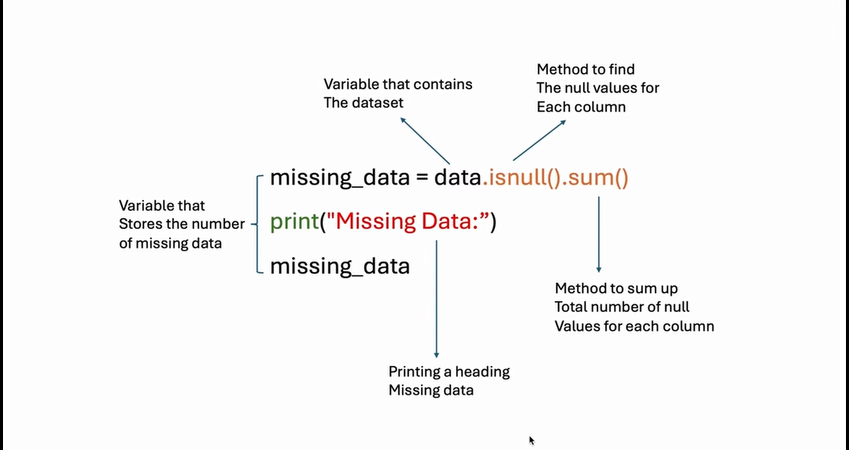

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import pandas as pd
data1 = pd.read_excel('/content/drive/MyDrive/DATA/additional_data.xlsx')
data2 = pd.read_excel('/content/drive/MyDrive/DATA/customer_data.xlsx')
data3 = pd.read_excel('/content/drive/MyDrive/DATA/performance_data.xlsx')

In [125]:
data1.head()

CustomerID  Gender  Age  Income         City     Region  \
0       C081    Male   37   50728      Chicago       West   
1       C082  Female   48   69629  Los Angeles    Midwest   
2       C083    Male   28   29184      Chicago  Northeast   
3       C084  Female   33   61265  Los Angeles       West   
4       C085  Female   30   63130      Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      11                   75.757                         2   
1                       9                   78.433                         4   
2                       7                   82.794                         3   
3                      15                   88.490                         2   
4                      13                  108.749                         3   

  Purchase_Channel Date_of_Purchase Churn_Status CustomerID.1  Recency  \
0         In-store       2023-09-10          Yes         C081        2   
1         In-store       2023-07-15           No         C082        3   
2           Online       2023-08-25          Yes         C083        3   
3           Online       2022-10-22          Yes         C084        4   
4           Online       2023-04-01          Yes         C085        4   

   Frequency_Score  Monetary_Score  
0                2               1  
1                4               4  
2                1               2  
3                1               3  
4                4               1

In [126]:
data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No

In [127]:
data3.head()

CustomerID  Recency  Frequency_Score  Monetary_Score
0       C001        3                2               2
1       C002        3                3               3
2       C003        4                4               4
3       C004        2                2               2
4       C005        1                1               1

In [128]:
# Calculate the number of missing (null) values in each column of the dataframe 'data2'
missing_values = data2.isnull().sum()

# Print a heading to indicate the output
print('missing_values:')

# Display the result: the count of missing values for each column
missing_values

missing_values:


CustomerID                  0
Gender                      0
Age                         0
Income                      5
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

---

# ✨ Imputing Missing Values

---

## 🔹 **Why Imputation Matters**

* ❌ **Deletion** → Removes missing data completely → risk of **information loss**.
* ✅ **Imputation** → Fills gaps intelligently → preserves **patterns & relationships**.
* 🌍 **Reality Check** → Real-world datasets are rarely perfect → **handling missingness is unavoidable**.

---

## 🔹 **Types of Imputation Techniques**

### 1️⃣ Simple Imputation

#### 📈 **Mean Imputation**

* 🔄 Replace missing values with the **average** of the column.
* ✅ Works well for **normally distributed numeric** data.
* ⚠️ Sensitive to **outliers**.

#### 🛡️ **Median Imputation**

* 🔄 Replace missing values with the **median** (middle value).
* ✅ More **robust to skewness & outliers**.
* 💡 Best for **skewed distributions**.

#### 🏷️ **Mode Imputation**

* 🔄 Replace missing values with the **most frequent value**.
* ✅ Best for **categorical features** (e.g., filling missing city with most common city).
* ⚠️ Can oversimplify if distribution is diverse.

---


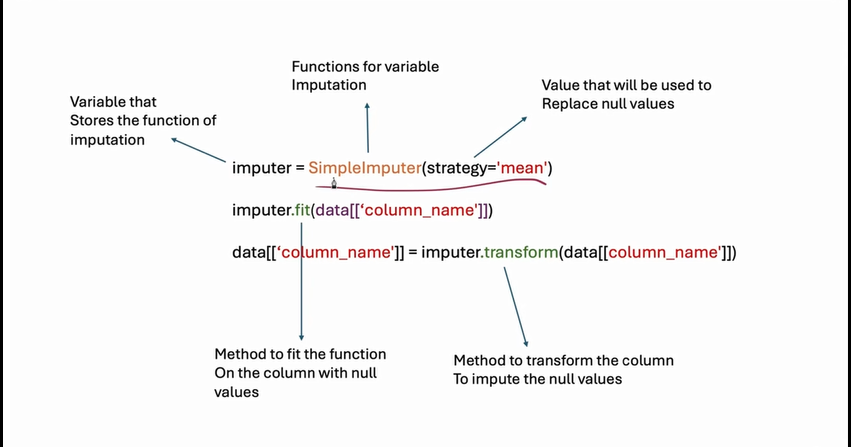

In [129]:
# Import the SimpleImputer class from scikit-learn
# SimpleImputer is used to handle missing values by replacing them
# with a specified strategy (mean, median, most frequent, or constant).
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
# Create a SimpleImputer object with the strategy 'median'
# This means missing values will be replaced with the median of the column
imputer = SimpleImputer(strategy='median')#mean, median - use to numeric value

# Fit the imputer on the 'Income' column of the dataframe
# This calculates the median of 'Income' (ignoring missing values)
imputer.fit(data2[['Income']])

# Transform the 'Income' column using the fitted imputer
# All missing values in 'Income' will now be replaced with the calculated median
data2[['Income']] = imputer.transform(data2[['Income']])

In [131]:
missing_values = data2.isnull().sum()
print('missing_values:')
missing_values

missing_values:


CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        3
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [132]:
# Create a SimpleImputer object with the strategy 'most_frequent'
# This means missing values will be replaced with the most common (mode) value in the column
imputer = SimpleImputer(strategy='most_frequent')#most frequent,constant - use to numeric value

# Fit the imputer on the 'City' column of the dataframe
# This finds the most frequent city in the column (ignoring missing values)
imputer.fit(data2[['City']])

# Transform the 'City' column using the fitted imputer
# All missing values in 'City' will now be replaced with the most frequent city
data2[['City']] = imputer.transform(data2[['City']])

In [133]:
missing_values = data2.isnull().sum()
print('missing_values:')
missing_values

missing_values:


CustomerID                  0
Gender                      0
Age                         0
Income                      0
City                        0
Region                      0
Frequency_of_Purchases      0
Average_Purchase_Amount     0
Customer_Lifespan_Months    0
Purchase_Channel            0
Date_of_Purchase            0
Churn_Status                0
dtype: int64

In [134]:
data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No

---

# 📊 Data Types in a DataFrame (Pandas)

In a **Pandas DataFrame**, each column has a **data type** that determines how values are stored and processed.
Here are the most commonly used ones:

---

## 1️⃣ **int64**

* 📝 **Description** → 64-bit integer (whole numbers).
* 📌 **Usage** → For numeric values **without decimals** (positive or negative).
* 💡 **Examples** → Counts, IDs, quantities.

---

## 2️⃣ **float64**

* 📝 **Description** → 64-bit floating-point numbers (decimals).
* 📌 **Usage** → For values requiring **precision**.
* 💡 **Examples** → Prices, percentages, measurements.

---

## 3️⃣ **object**

* 📝 **Description** → Strings or **mixed data types**.
* 📌 **Usage** → For storing **textual or categorical** data.
* 💡 **Examples** → Names, addresses, categories.

---

## 4️⃣ **bool**

* 📝 **Description** → Boolean values (`True` / `False`).
* 📌 **Usage** → For **binary states** or flags.
* 💡 **Examples** → Yes/No fields, pass/fail conditions.

---

## 5️⃣ **datetime64**

* 📝 **Description** → Stores **date & time values**.
* 📌 **Usage** → For working with **timestamps & time-based operations**.
* 💡 **Examples** → Event dates, transaction timestamps.

---

✨ **Tip**: You can check the data types of all columns in a DataFrame using:

```python
df.dtypes
```

---

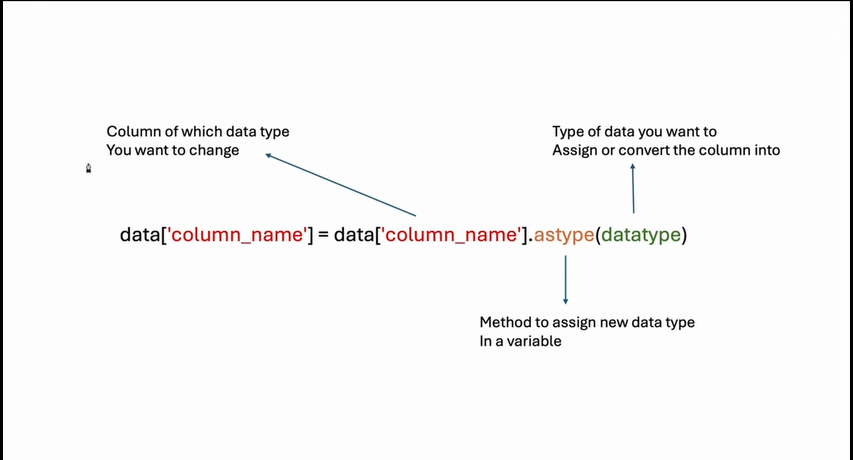

In [135]:
data2.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [136]:
#change data type
data2['Age'] = data2['Age'].astype('str')

In [137]:
data2.dtypes

CustomerID                   object
Gender                       object
Age                          object
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [138]:
data2['Age'] = data2['Age'].astype('int')

In [139]:
data2.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

---

# 🔄 Understanding Inconsistent Values

---

## 🔹 **Causes of Inconsistent Values**

1. **🖊️ Human Entry Error**

   * Typos, incorrect formatting, accidental mistakes.

2. **⚖️ Lack of Standardization**

   * Different conventions across datasets
   * *Example*: `"USA"` vs. `"United States"`.

3. **🔗 Merging Multiple Sources**

   * Different formats and naming rules across datasets.

4. **❓ Ambiguous Data Fields**

   * Poorly defined columns → varied interpretations
   * *Example*: `"Status"` = `"Active"`, `"Inactive"`, `"N/A"`.

---

## 🔹 **Real-World Impacts**

1. **📊 Inaccurate Reporting** → Misleading insights & poor decisions.
2. **📉 Broken Grouping in Dashboards** → Wrong aggregations & charts.
3. **🤖 Weak ML Models** → Lower prediction accuracy & reliability.
4. **💰 Higher Cleaning Costs** → More time, money, and effort wasted.

---

## 🔹 **Types of Inconsistencies**

1. **📅 Format Issues**

   * Inconsistent date/time styles
   * *Example*: `MM/DD/YYYY` vs. `DD-MM-YYYY`.

2. **🗂️ Semantic Differences**

   * Multiple representations of the same entity
   * *Example*: `"NY"`, `"New York"`, `"N.Y."`.

3. **✏️ Spelling & Case Variations**

   * Typos or inconsistent capitalization
   * *Example*: `"color"`, `"Colour"`, `"COLR"`.

4. **⚠️ Logical Contradictions**

   * Values that don’t make sense together
   * *Example*: `Age = 5` and `Marital Status = Married`.

---

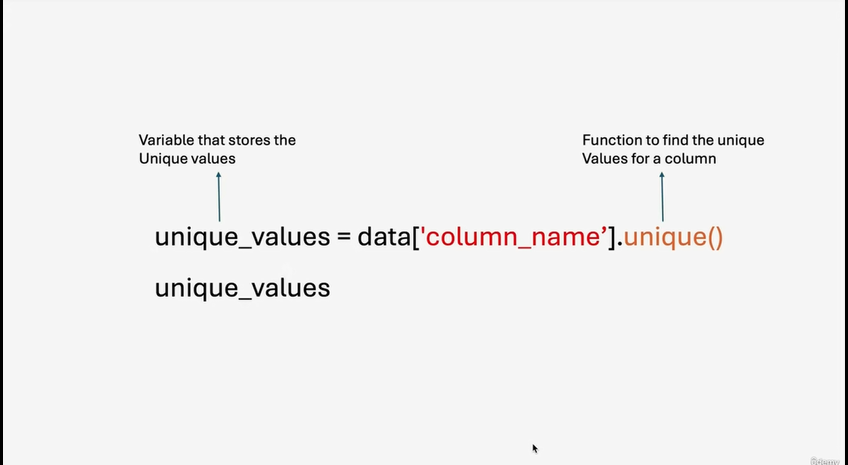

In [140]:
# Get all the unique values from the 'Customer_Lifespan_Months' column
# This will return an array of distinct values (ignoring duplicates)
unique_value = data2['Customer_Lifespan_Months'].unique()

# Display the unique values
unique_value

array([3, 4, 1, 2, 5, 'XXXX'], dtype=object)

In [141]:
# Remove rows where the column 'Customer_Lifespan_Months' has the value 'XXXX'
# (likely invalid or placeholder entries for missing lifespan data)
data2 = data2[data2['Customer_Lifespan_Months'] != 'XXXX']

# Display the first 5 rows of the cleaned dataframe to confirm the change
data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount Customer_Lifespan_Months  \
0                      10                   98.241                        3   
1                      15                  157.640                        4   
2                       1                   41.252                        1   
3                       6                   67.329                        1   
4                       3                   52.763                        1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No

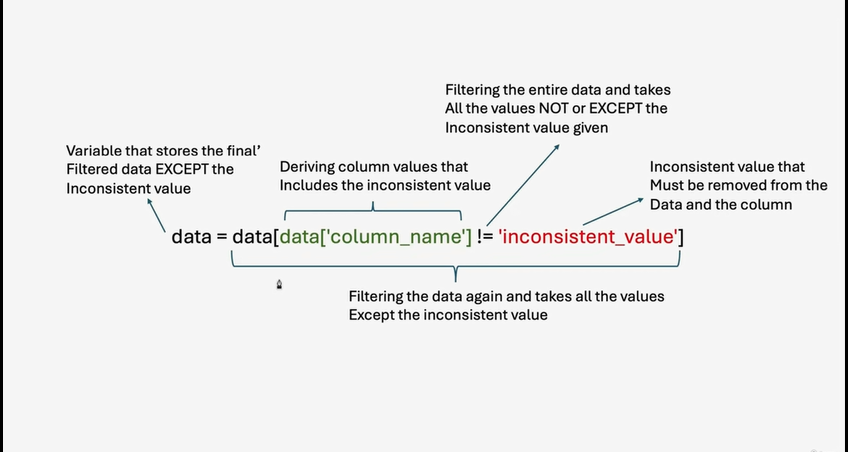

In [142]:
data2['Customer_Lifespan_Months'].unique()

array([3, 4, 1, 2, 5], dtype=object)

In [143]:
data2.dtypes

CustomerID                   object
Gender                       object
Age                           int64
Income                      float64
City                         object
Region                       object
Frequency_of_Purchases        int64
Average_Purchase_Amount     float64
Customer_Lifespan_Months     object
Purchase_Channel             object
Date_of_Purchase             object
Churn_Status                 object
dtype: object

In [144]:
# Convert the 'Customer_Lifespan_Months' column from string (object) type to integer type
# This allows you to perform numerical calculations and statistical analysis on this column
data2['Customer_Lifespan_Months'] = data2['Customer_Lifespan_Months'].astype(int)

In [145]:
# Convert the 'Date_of_Purchase' column to datetime format
# This ensures that the column is treated as actual dates (instead of strings),
# allowing you to perform date-based operations like filtering, sorting, and calculating differences
data2['Date_of_Purchase'] = data2['Date_of_Purchase'].astype('datetime64[ns]')

In [146]:
data2.dtypes

CustomerID                          object
Gender                              object
Age                                  int64
Income                             float64
City                                object
Region                              object
Frequency_of_Purchases               int64
Average_Purchase_Amount            float64
Customer_Lifespan_Months             int64
Purchase_Channel                    object
Date_of_Purchase            datetime64[ns]
Churn_Status                        object
dtype: object

In [147]:
 data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No


---

# 🔁 Understanding Duplicate Values

---

## 🔹 **Types of Duplicates**

1. **📝 Full Duplicates**

   * Rows that are **exactly the same** across all columns.
   * 💡 *Example*: Two identical customer records with the same name, email, and address.

2. **🔍 Partial Duplicates**

   * Rows that match on **key identifiers**, but differ in other fields.
   * 💡 *Example*: Same customer name, but different purchase records.

---

## 🔹 **Causes of Duplicates**

1. **✏️ Manual Data Entry** → Typing mistakes or repeated entries.
2. **📥 Data Collection Errors** → Duplicate form submissions or faulty sensors.
3. **🔗 Dataset Merging** → Combining sources without duplicate handling.
4. **⚙️ System Glitches** → Sync issues or bugs saving records multiple times.

---

## 🔹 **Problems Caused by Duplicates**

1. **📊 Skewed Analysis** → Inflated counts, averages, totals.
2. **⚠️ Misleading Insights** → Poor decisions based on false patterns.
3. **❌ Reduced Data Quality** → Loss of trust in dataset reliability.
4. **💾 Extra Storage Cost** → Wasted space and higher processing time.

---


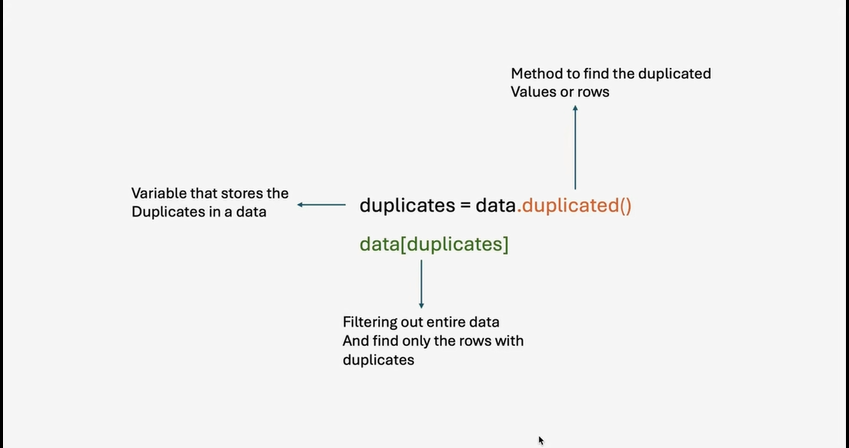

In [148]:
# Check for duplicate rows in the dataframe 'data2'
# This returns a boolean Series where True indicates a duplicate row
duplicates = data2.duplicated()

# Display all rows that are duplicates
data2[duplicates]

CustomerID  Gender  Age   Income         City     Region  \
80       C021  Female   22  41743.0  Los Angeles  Northeast   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
80                       4                   54.599                         1   

   Purchase_Channel Date_of_Purchase Churn_Status  
80           Online       2023-06-08           No

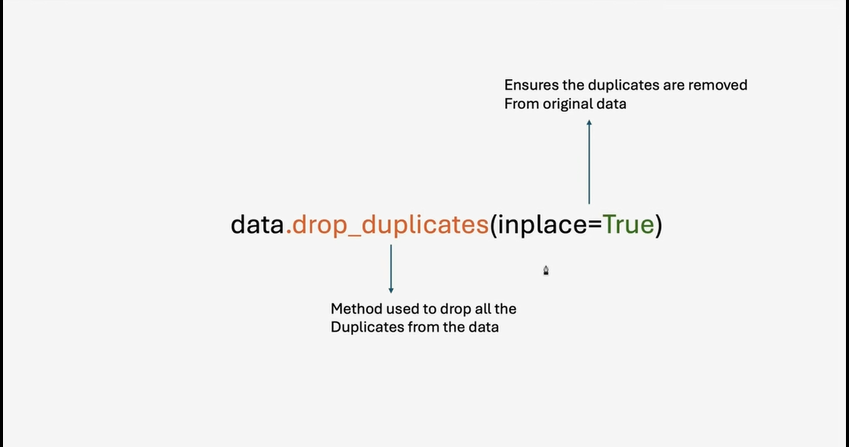

In [149]:
data2 = data2.drop_duplicates()#droup duplicates'.drop_duplicates(inplace=True)'

In [150]:
duplicates = data2.duplicated()
display(data2[duplicates])

Empty DataFrame
Columns: [CustomerID, Gender, Age, Income, City, Region, Frequency_of_Purchases, Average_Purchase_Amount, Customer_Lifespan_Months, Purchase_Channel, Date_of_Purchase, Churn_Status]
Index: []

---

# 🔄 Understanding Data Sorting & Ordering

---

## 🔹 **Why Sorting Data Matters**

1. **📖 Improves Readability**

   * Easier to scan, interpret, and understand datasets.

2. **📊 Enables Comparisons**

   * Quickly spot **trends, patterns, and anomalies**.

3. **🏆 Essential for Ranking & Grouping**

   * Used in leaderboards, top-N analysis, and grouped summaries.

4. **🔍 Enhances Filtering & Analysis**

   * Simplifies working with subsets of data.

5. **📑 Improves Reporting**

   * Ordered data = cleaner, more professional reports.

---

## 🔹 **Types of Sorting**

1. **⬆️ Ascending Order**

   * **Smallest → Largest** (A → Z, 0 → 9).
   * 💡 *Examples*: Names alphabetically, prices from lowest to highest.

2. **⬇️ Descending Order**

   * **Largest → Smallest** (Z → A, 9 → 0).
   * 💡 *Examples*: Sales from highest to lowest, dates from newest to oldest.

---


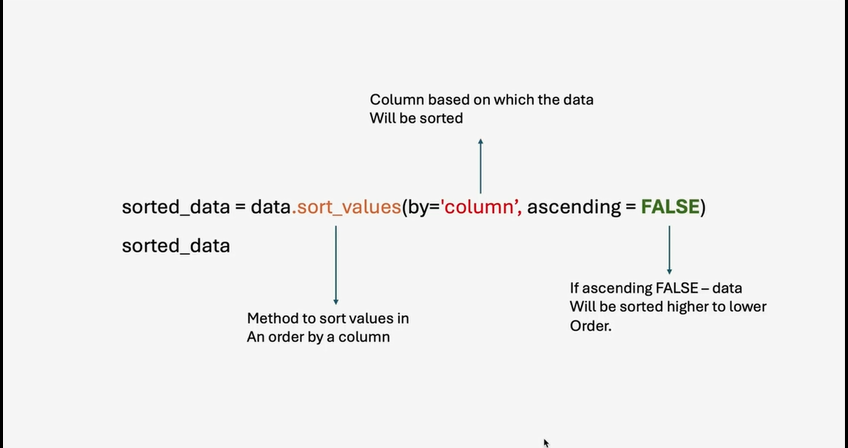

In [151]:
# Sort the dataframe 'data2' by the 'Income' column in descending order
# ascending=False ensures the highest incomes appear first
sorted_data = data2.sort_values(by='Income', ascending=False)

# Display the first 5 rows of the sorted dataframe
sorted_data.head()

CustomerID  Gender  Age    Income         City     Region  \
55       C056  Female   29  107662.0      Houston  Northeast   
22       C023  Female   41  105186.0  Los Angeles    Midwest   
70       C071  Female   36  103264.0  Los Angeles  Northeast   
32       C033  Female   31   98590.0      Houston       West   
52       C053  Female   45   90860.0      Houston  Northeast   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
55                       3                   47.877                         1   
22                      14                  137.697                         4   
70                      11                  117.394                         3   
32                       7                   76.114                         2   
52                      10                  105.287                         3   

   Purchase_Channel Date_of_Purchase Churn_Status  
55         In-store       2022-02-11           No  
22           Online       2023-07-15          Yes  
70           Online       2023-12-22          Yes  
32           Online       2023-06-30           No  
52         In-store       2023-12-29          Yes

---

# ✂️ Data Slicing

---

## 🔹 **Why is Data Slicing Important?**

1. **⚡ Efficient Analysis**

   * Focus on smaller, relevant subsets → faster & easier analysis.

2. **🎯 Customized Views**

   * Extract only the segments or conditions you need.

3. **🔍 Data Exploration**

   * Isolate rows/columns to spot **trends, patterns, anomalies**.

4. **🤖 Input for Models**

   * Select only **relevant features & samples** for machine learning.

5. **🚀 Improved Performance**

   * Reduces memory usage & speeds up processing.

---


In [152]:
display(sorted_data.shape)

(79, 12)

In [153]:
data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No

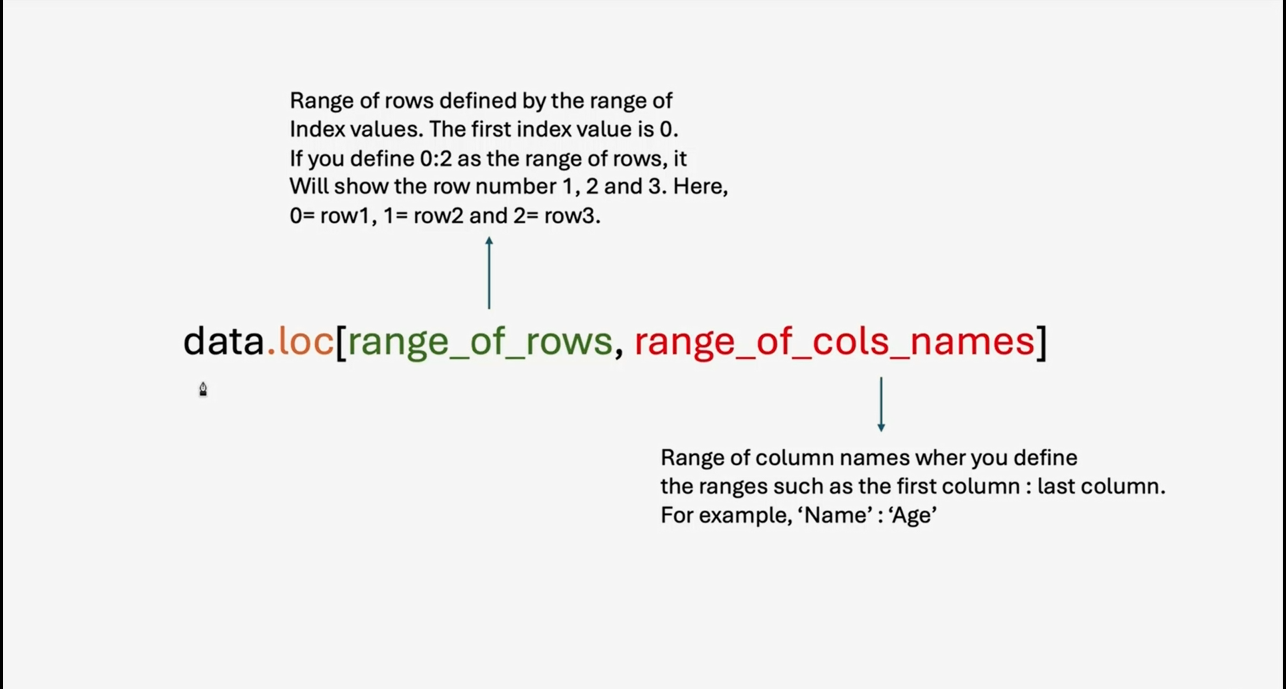

In [154]:
data2.loc[0:4, 'CustomerID':'Region'] #.loc - select data coloms in 'CustomerID'to'Region'

CustomerID  Gender  Age   Income      City     Region
0       C001    Male   49  72504.0   Chicago  Northeast
1       C002  Female   38  40881.0  New York       West
2       C003    Male   17  63333.0  New York  Northeast
3       C004    Male   34  58030.0   Chicago    Midwest
4       C005    Male   30  78889.0   Houston    Midwest

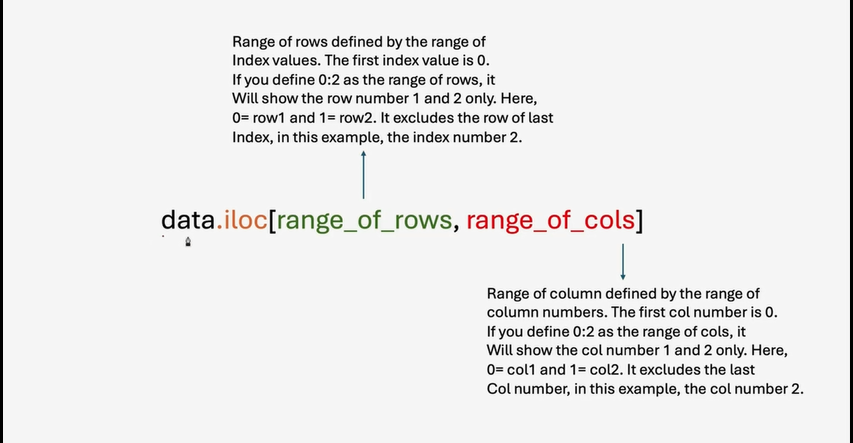

In [155]:
data2.iloc[0:5,0:6]#.iloc - select data coloms in 'CustomerID'to'Region'

CustomerID  Gender  Age   Income      City     Region
0       C001    Male   49  72504.0   Chicago  Northeast
1       C002  Female   38  40881.0  New York       West
2       C003    Male   17  63333.0  New York  Northeast
3       C004    Male   34  58030.0   Chicago    Midwest
4       C005    Male   30  78889.0   Houston    Midwest

In [156]:
 data2.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel Date_of_Purchase Churn_Status  
0           Online       2022-03-05          Yes  
1         In-store       2023-07-08          Yes  
2           Online       2023-01-30           No  
3         In-store       2023-06-01           No  
4           Online       2022-09-23           No

---

# 🔍 Understanding Data Filtering

---

## 🔹 **What is Data Filtering?**

1. **🎯 Focus on Relevant Subsets**

   * Select rows/columns that meet specific conditions.

2. **📊 Improves Clarity**

   * Removes noise → makes insights easier to interpret.

3. **⚡ Enables Conditional Viewing**

   * View data based on rules (e.g., `Age > 30`, `Sales > 5000`).

4. **🔧 Prepares for Deeper Analysis**

   * Sets up clean, targeted datasets for aggregation, statistics, or modeling.

---

## 🔹 **Why Filtering is Important in Data Analysis**

1. **🎯 Targeted Insights**

   * Focus on what really matters in the dataset.

2. **🔍 Simplifies Exploration**

   * Spot trends, anomalies, and patterns faster.

3. **✅ Supports Better Decisions**

   * Decision-making based on **relevant** data, not clutter.

4. **🧹 Cleaner Inputs**

   * Only passes high-quality, filtered data to models/analysis.

5. **⏱️ Saves Time & Resources**

   * Smaller, leaner datasets = faster computation.

---


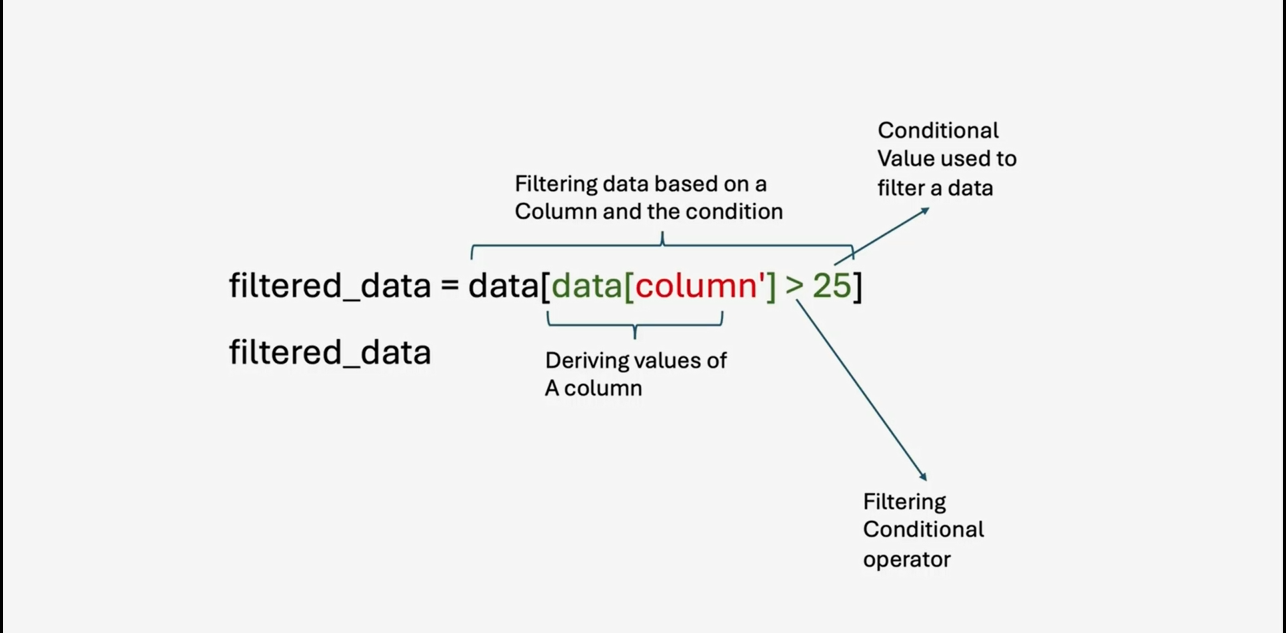

In [157]:
# Filter the dataframe 'data2' to include only rows where the 'Gender' column is 'Male'
male_data = data2[data2['Gender'] == 'Male']

# Display the filtered dataframe containing only male customers
male_data

CustomerID Gender  Age   Income         City     Region  \
0        C001   Male   49  72504.0      Chicago  Northeast   
2        C003   Male   17  63333.0     New York  Northeast   
3        C004   Male   34  58030.0      Chicago    Midwest   
4        C005   Male   30  78889.0      Houston    Midwest   
5        C006   Male   52  76470.0      Chicago    Midwest   
7        C008   Male   38  38401.0      Houston       West   
8        C009   Male   44  73105.0  Los Angeles  Northeast   
14       C015   Male   44  32500.0     New York  Northeast   
15       C016   Male   37  59214.0      Houston    Midwest   
17       C018   Male   39  86730.0     New York    Midwest   
18       C019   Male   32  41111.0  Los Angeles       West   
19       C020   Male   28  37050.0  Los Angeles    Midwest   
21       C022   Male   26  78988.0      Chicago    Midwest   
23       C024   Male   54  27660.0     New York    Midwest   
24       C025   Male   27  45239.0  Los Angeles       West   
33       C034   Male   53  78203.0      Houston  Northeast   
34       C035   Male   28  50039.0     New York       West   
35       C036   Male   23  43471.0     New York       West   
38       C039   Male   43  51799.0      Houston       West   
41       C042   Male   53  52616.0      Houston  Northeast   
42       C043   Male   44  66344.0      Chicago    Midwest   
44       C045   Male   22  46979.0      Houston       West   
45       C046   Male   44  59154.0      Chicago       West   
48       C049   Male   49  58036.0  Los Angeles       West   
53       C054   Male   31  51243.0      Houston  Northeast   
57       C058   Male   18  39995.0      Houston       West   
59       C060   Male   35  82532.0      Houston    Midwest   
60       C061   Male   24  53080.0  Los Angeles       West   
62       C063   Male   39  47127.0     New York       West   
63       C064   Male   30  58033.0      Houston       West   
64       C065   Male   31  50889.0     New York       West   
66       C067   Male   54  58033.0      Houston       West   
69       C070   Male   36  58033.0      Chicago  Northeast   
72       C073   Male   28  73631.0  Los Angeles       West   
75       C076   Male   44  59659.0      Houston    Midwest   
77       C078   Male   30  76887.0      Houston    Midwest   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                       10                   98.241                         3   
2                        1                   41.252                         1   
3                        6                   67.329                         1   
4                        3                   52.763                         1   
5                       11                  117.012                         3   
7                        6                   70.730                         2   
8                       12                  124.887                         3   
14                       9                   96.473                         3   
15                      10                  108.902                         3   
17                      11                  118.579                         3   
18                      14                  133.229                         4   
19                       6                   71.789                         2   
21                       7                   76.826                         2   
23                      12                  125.763                         3   
24                      12                  127.888                         3   
33                      12                  130.277                         3   
34                       7                   75.568                         2   
35                       5                   65.357                         1   
38                      14                  133.540                         4   
41                      11                  120.311                         3   
42     

In [158]:
male_data1 = data2[(data2['Purchase_Channel'] == 'In-store') & (data2['Gender'] == 'Male')]

# Display the filtered dataframe containing only male customers who purchased in-store
display(male_data1)

CustomerID Gender  Age   Income         City     Region  \
3        C004   Male   34  58030.0      Chicago    Midwest   
21       C022   Male   26  78988.0      Chicago    Midwest   
24       C025   Male   27  45239.0  Los Angeles       West   
33       C034   Male   53  78203.0      Houston  Northeast   
42       C043   Male   44  66344.0      Chicago    Midwest   
57       C058   Male   18  39995.0      Houston       West   
60       C061   Male   24  53080.0  Los Angeles       West   
63       C064   Male   30  58033.0      Houston       West   
72       C073   Male   28  73631.0  Los Angeles       West   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
3                        6                   67.329                         1   
21                       7                   76.826                         2   
24                      12                  127.888                         3   
33                      12                  130.277                         3   
42                      12                  130.562                         3   
57                       7                   81.111                         2   
60                      16                  193.046                         5   
63                      10                  107.919                         3   
72                       9                   90.344                         2   

   Purchase_Channel Date_of_Purchase Churn_Status  
3          In-store       2023-06-01           No  
21         In-store       2023-12-24           No  
24         In-store       2022-04-04          Yes  
33         In-store       2023-06-05          Yes  
42         In-store       2023-05-17          Yes  
57         In-store       2022-04-12           No  
60         In-store       2022-07-28          Yes  
63         In-store       2023-11-16          Yes  
72         In-store       2022-11-20           No

In [159]:
male_data = data2[data2['Gender'] == 'Male']
male_data

CustomerID Gender  Age   Income         City     Region  \
0        C001   Male   49  72504.0      Chicago  Northeast   
2        C003   Male   17  63333.0     New York  Northeast   
3        C004   Male   34  58030.0      Chicago    Midwest   
4        C005   Male   30  78889.0      Houston    Midwest   
5        C006   Male   52  76470.0      Chicago    Midwest   
7        C008   Male   38  38401.0      Houston       West   
8        C009   Male   44  73105.0  Los Angeles  Northeast   
14       C015   Male   44  32500.0     New York  Northeast   
15       C016   Male   37  59214.0      Houston    Midwest   
17       C018   Male   39  86730.0     New York    Midwest   
18       C019   Male   32  41111.0  Los Angeles       West   
19       C020   Male   28  37050.0  Los Angeles    Midwest   
21       C022   Male   26  78988.0      Chicago    Midwest   
23       C024   Male   54  27660.0     New York    Midwest   
24       C025   Male   27  45239.0  Los Angeles       West   
33       C034   Male   53  78203.0      Houston  Northeast   
34       C035   Male   28  50039.0     New York       West   
35       C036   Male   23  43471.0     New York       West   
38       C039   Male   43  51799.0      Houston       West   
41       C042   Male   53  52616.0      Houston  Northeast   
42       C043   Male   44  66344.0      Chicago    Midwest   
44       C045   Male   22  46979.0      Houston       West   
45       C046   Male   44  59154.0      Chicago       West   
48       C049   Male   49  58036.0  Los Angeles       West   
53       C054   Male   31  51243.0      Houston  Northeast   
57       C058   Male   18  39995.0      Houston       West   
59       C060   Male   35  82532.0      Houston    Midwest   
60       C061   Male   24  53080.0  Los Angeles       West   
62       C063   Male   39  47127.0     New York       West   
63       C064   Male   30  58033.0      Houston       West   
64       C065   Male   31  50889.0     New York       West   
66       C067   Male   54  58033.0      Houston       West   
69       C070   Male   36  58033.0      Chicago  Northeast   
72       C073   Male   28  73631.0  Los Angeles       West   
75       C076   Male   44  59659.0      Houston    Midwest   
77       C078   Male   30  76887.0      Houston    Midwest   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                       10                   98.241                         3   
2                        1                   41.252                         1   
3                        6                   67.329                         1   
4                        3                   52.763                         1   
5                       11                  117.012                         3   
7                        6                   70.730                         2   
8                       12                  124.887                         3   
14                       9                   96.473                         3   
15                      10                  108.902                         3   
17                      11                  118.579                         3   
18                      14                  133.229                         4   
19                       6                   71.789                         2   
21                       7                   76.826                         2   
23                      12                  125.763                         3   
24                      12                  127.888                         3   
33                      12                  130.277                         3   
34                       7                   75.568                         2   
35                       5                   65.357                         1   
38                      14                  133.540                         4   
41                      11                  120.311                         3   
42     

In [160]:
# Filter the 'male_data' dataframe to include only male customers
# who have made more than 5 purchases
male_Frequency_of_Purchases = male_data[male_data['Frequency_of_Purchases'] > 5]

# Display the filtered dataframe
male_Frequency_of_Purchases

CustomerID Gender  Age   Income         City     Region  \
0        C001   Male   49  72504.0      Chicago  Northeast   
3        C004   Male   34  58030.0      Chicago    Midwest   
5        C006   Male   52  76470.0      Chicago    Midwest   
7        C008   Male   38  38401.0      Houston       West   
8        C009   Male   44  73105.0  Los Angeles  Northeast   
14       C015   Male   44  32500.0     New York  Northeast   
15       C016   Male   37  59214.0      Houston    Midwest   
17       C018   Male   39  86730.0     New York    Midwest   
18       C019   Male   32  41111.0  Los Angeles       West   
19       C020   Male   28  37050.0  Los Angeles    Midwest   
21       C022   Male   26  78988.0      Chicago    Midwest   
23       C024   Male   54  27660.0     New York    Midwest   
24       C025   Male   27  45239.0  Los Angeles       West   
33       C034   Male   53  78203.0      Houston  Northeast   
34       C035   Male   28  50039.0     New York       West   
38       C039   Male   43  51799.0      Houston       West   
41       C042   Male   53  52616.0      Houston  Northeast   
42       C043   Male   44  66344.0      Chicago    Midwest   
44       C045   Male   22  46979.0      Houston       West   
45       C046   Male   44  59154.0      Chicago       West   
48       C049   Male   49  58036.0  Los Angeles       West   
53       C054   Male   31  51243.0      Houston  Northeast   
57       C058   Male   18  39995.0      Houston       West   
59       C060   Male   35  82532.0      Houston    Midwest   
60       C061   Male   24  53080.0  Los Angeles       West   
62       C063   Male   39  47127.0     New York       West   
63       C064   Male   30  58033.0      Houston       West   
64       C065   Male   31  50889.0     New York       West   
66       C067   Male   54  58033.0      Houston       West   
69       C070   Male   36  58033.0      Chicago  Northeast   
72       C073   Male   28  73631.0  Los Angeles       West   
75       C076   Male   44  59659.0      Houston    Midwest   
77       C078   Male   30  76887.0      Houston    Midwest   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                       10                   98.241                         3   
3                        6                   67.329                         1   
5                       11                  117.012                         3   
7                        6                   70.730                         2   
8                       12                  124.887                         3   
14                       9                   96.473                         3   
15                      10                  108.902                         3   
17                      11                  118.579                         3   
18                      14                  133.229                         4   
19                       6                   71.789                         2   
21                       7                   76.826                         2   
23                      12                  125.763                         3   
24                      12                  127.888                         3   
33                      12                  130.277                         3   
34                       7                   75.568                         2   
38                      14                  133.540                         4   
41                      11                  120.311                         3   
42                      12                  130.562                         3   
44                       8                   86.904                         2   
45                      15                  152.291                         4   
48                      12                  129.524                         3   
53                       7                   73.408                         2   
57                       7     

In [161]:
# Filter the 'data2' dataframe to include only rows where
# 'Customer_Lifespan_Months' is between 2 and 5 (inclusive)
filtered_data = data2[(data2['Customer_Lifespan_Months'] >= 2) &
                      (data2['Customer_Lifespan_Months'] <= 5)]

# Display the filtered dataframe
filtered_data

CustomerID  Gender  Age   Income         City     Region  \
0        C001    Male   49  72504.0      Chicago  Northeast   
1        C002  Female   38  40881.0     New York       West   
5        C006    Male   52  76470.0      Chicago    Midwest   
6        C007  Female   35  60349.0      Houston  Northeast   
7        C008    Male   38  38401.0      Houston       West   
..        ...     ...  ...      ...          ...        ...   
72       C073    Male   28  73631.0  Los Angeles       West   
75       C076    Male   44  59659.0      Houston    Midwest   
77       C078    Male   30  76887.0      Houston    Midwest   
78       C079  Female   42  56569.0     New York       West   
79       C080  Female   26  43931.0  Los Angeles  Northeast   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                       10             9.824100e+01                         3   
1                       15             1.576400e+02                         4   
5                       11             1.170120e+02                         3   
6                        9             9.554400e+01                         2   
7                        6             7.073000e+01                         2   
..                     ...                      ...                       ...   
72                       9             9.034400e+01                         2   
75                      14             1.345400e+02                         4   
77                       7             8.081600e+01                         2   
78                      11             1.342341e+07                         3   
79                       9             9.153600e+01                         2   

   Purchase_Channel Date_of_Purchase Churn_Status  
0            Online       2022-03-05          Yes  
1          In-store       2023-07-08          Yes  
5            Online       2022-11-30          Yes  
6          In-store       2023-07-20           No  
7            Online       2022-05-24           No  
..              ...              ...          ...  
72         In-store       2022-11-20           No  
75           Online       2023-12-25          Yes  
77           Online       2022-11-14           No  
78         In-store       2022-12-08          Yes  
79         In-store       2023-09-18           No  

[65 rows x 12 columns]

---

# 🔗 Understanding Data Merging

---

## 🔹 **Why is Data Merging Important?**

1. **🔗 Combine Perspectives**

   * Integrates multiple datasets for a **complete picture**.

2. **📉 Reduce Redundancy**

   * Eliminates duplicate information → cleaner data.

3. **📊 Prepare for Analysis**

   * Brings all relevant variables into **one dataset**.

4. **🌐 Integrate from Multiple Sources**

   * Essential when working with data from different systems or APIs.

---

## 🔹 **Types of Joins in Merging**

1. **📥 Inner Join**

   * Returns only records with **matching values** in both datasets.
   * ❌ Non-matching rows are discarded.

2. **⬅️ Left Join**

   * Returns **all rows from the left dataset**, plus matches from the right.
   * Missing matches filled with **NULL**.

3. **➡️ Right Join**

   * Returns **all rows from the right dataset**, plus matches from the left.
   * Missing matches filled with **NULL**.

4. **🔄 Outer Join**

   * Returns **all rows from both datasets**.
   * Missing matches filled with **NULL** on either side.

---

## 🔹 **Common Issues & Fixes**

1. **📛 Mismatched Column Names** → Rename or align column names before merging.
2. **♻️ Duplicate Keys** → Deduplicate or aggregate key columns.
3. **🚫 Nulls in Join Keys** → Fill or drop missing values before merging.
4. **⚖️ Data Type Mismatch** → Ensure join keys have the same data type.
5. **📝 Overlapping Columns** → Rename or use suffixes to avoid ambiguity.

---



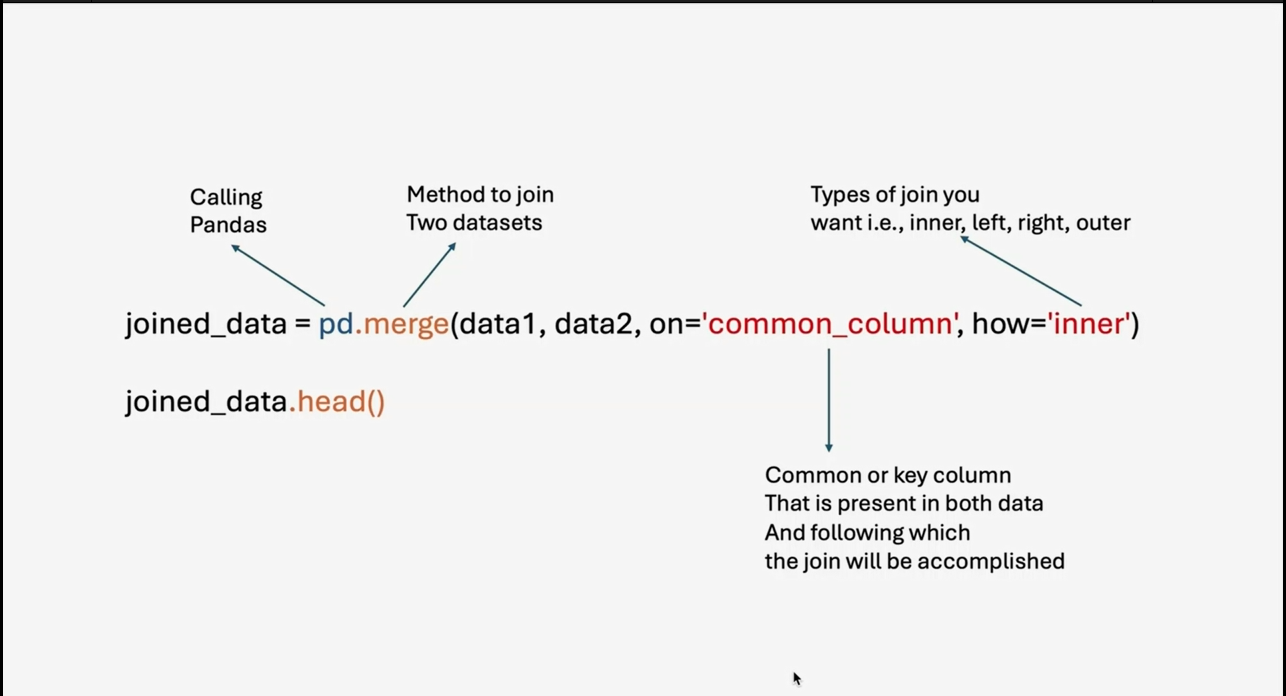

In [162]:
data3.head()

CustomerID  Recency  Frequency_Score  Monetary_Score
0       C001        3                2               2
1       C002        3                3               3
2       C003        4                4               4
3       C004        2                2               2
4       C005        1                1               1

In [163]:
# Merge two dataframes 'data2' and 'data3' using an inner join on the 'CustomerID' column
# 'inner' join means only rows with matching 'CustomerID' in both dataframes will be included
joined_data = pd.merge(data2, data3, on='CustomerID', how='inner')

# Display the first 5 rows of the merged dataframe
joined_data.head()

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel Date_of_Purchase Churn_Status  Recency  Frequency_Score  \
0           Online       2022-03-05          Yes        3                2   
1         In-store       2023-07-08          Yes        3                3   
2           Online       2023-01-30           No        4                4   
3         In-store       2023-06-01           No        2                2   
4           Online       2022-09-23           No        1                1   

   Monetary_Score  
0               2  
1               3  
2               4  
3               2  
4               1

In [164]:
joined_data.shape

(79, 15)

---

# ➕ Understanding Data Concatenation

---

## 🔹 **Why Data Concatenation Matters**

1. **📦 Combine Multiple Batches**

   * Integrate data collected in different sessions into a **single dataset**.

2. **➕ Append New Records**

   * Easily add rows to grow the dataset over time.

3. **📐 Reshape Datasets**

   * Stack data **vertically** (rows) or **horizontally** (columns) as needed.

4. **🤖 Prepare Inputs for Analysis/Modeling**

   * Create a **unified dataset** ready for analytics or machine learning.

---

## 🔹 **Concatenation vs. Merging**

### **📏 Concatenation**

* **Definition** → Stack datasets **vertically** (rows) or **horizontally** (columns).
* **Key Point** → **Does not** rely on relationships between datasets.
* **Usage** →

  * When datasets share the **same structure** (columns).
  * When appending new records for continuous growth.

### **🔗 Merging**

* **Definition** → Combine datasets based on **common key(s)**.
* **Key Point** → Preserves **relationships** between datasets.
* **Usage** →

  * Integrating different sources (e.g., customers + transactions).

---

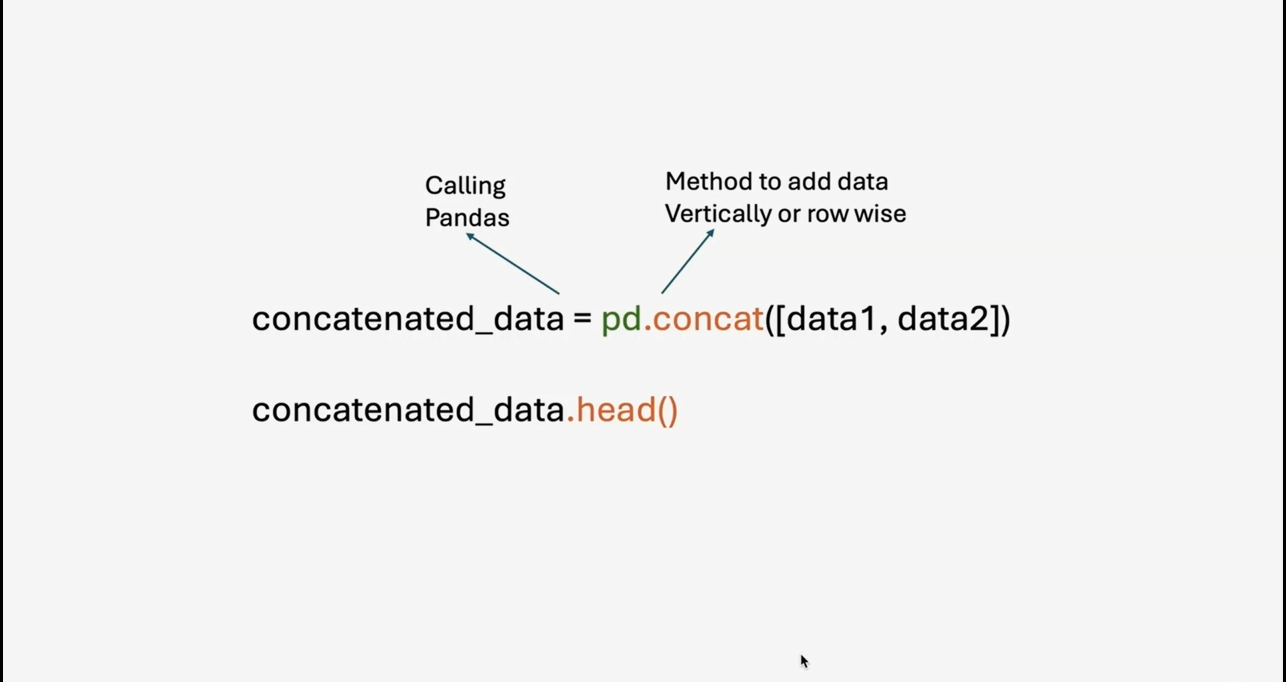

In [165]:
joined_data.shape

(79, 15)

In [166]:
additional_data = data1
additional_data.head()

CustomerID  Gender  Age  Income         City     Region  \
0       C081    Male   37   50728      Chicago       West   
1       C082  Female   48   69629  Los Angeles    Midwest   
2       C083    Male   28   29184      Chicago  Northeast   
3       C084  Female   33   61265  Los Angeles       West   
4       C085  Female   30   63130      Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      11                   75.757                         2   
1                       9                   78.433                         4   
2                       7                   82.794                         3   
3                      15                   88.490                         2   
4                      13                  108.749                         3   

  Purchase_Channel Date_of_Purchase Churn_Status CustomerID.1  Recency  \
0         In-store       2023-09-10          Yes         C081        2   
1         In-store       2023-07-15           No         C082        3   
2           Online       2023-08-25          Yes         C083        3   
3           Online       2022-10-22          Yes         C084        4   
4           Online       2023-04-01          Yes         C085        4   

   Frequency_Score  Monetary_Score  
0                2               1  
1                4               4  
2                1               2  
3                1               3  
4                4               1

In [167]:
# Concatenate the 'joined_data' and 'additional_data' dataframes vertically (stack rows)
# This combines all rows from both dataframes into a single dataframe
final_data = pd.concat([joined_data, additional_data])

# Display the shape of the resulting dataframe (number of rows and columns)
display(final_data.shape)

# Display the first 5 rows of the final concatenated dataframe
final_data.head()

(99, 16)

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel     Date_of_Purchase Churn_Status  Recency  \
0           Online  2022-03-05 00:00:00          Yes        3   
1         In-store  2023-07-08 00:00:00          Yes        3   
2           Online  2023-01-30 00:00:00           No        4   
3         In-store  2023-06-01 00:00:00           No        2   
4           Online  2022-09-23 00:00:00           No        1   

   Frequency_Score  Monetary_Score CustomerID.1  
0                2               2          NaN  
1                3               3          NaN  
2                4               4          NaN  
3                2               2          NaN  
4                1               1          NaN

In [168]:
final_data.tail()

CustomerID  Gender  Age   Income     City     Region  \
15       C096    Male   32  18600.0  Chicago  Northeast   
16       C097    Male   38  68525.0  Chicago       West   
17       C098  Female   24  73538.0  Houston       West   
18       C099  Female   20  47251.0  Chicago    Midwest   
19       C100    Male   39  52054.0  Chicago    Midwest   

    Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
15                      12                  123.003                         4   
16                      13                  106.526                         4   
17                       3                  162.533                         1   
18                       5                  145.404                         2   
19                      14                   36.975                         2   

   Purchase_Channel Date_of_Purchase Churn_Status  Recency  Frequency_Score  \
15           Online       2022-02-03          Yes        4                2   
16           Online       2023-09-20          Yes        4                3   
17         In-store       2023-11-04          Yes        2                1   
18         In-store       2022-09-24           No        4                3   
19         In-store       2023-05-03           No        1                4   

    Monetary_Score CustomerID.1  
15               3         C096  
16               3         C097  
17               1         C098  
18               1         C099  
19               4         C100

In [169]:
# Concatenate 'joined_data' and 'additional_data' dataframes vertically (stack rows)
# Then reset the index of the resulting dataframe and drop the old index
# This ensures the row numbers are sequential from 0 to n-1
final_data = pd.concat([joined_data, additional_data]).reset_index(drop=True)

# Display the shape of the final dataframe (number of rows and columns)
display(final_data.shape)

# Display the first 5 rows of the final dataframe
final_data.head()

(99, 16)

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel     Date_of_Purchase Churn_Status  Recency  \
0           Online  2022-03-05 00:00:00          Yes        3   
1         In-store  2023-07-08 00:00:00          Yes        3   
2           Online  2023-01-30 00:00:00           No        4   
3         In-store  2023-06-01 00:00:00           No        2   
4           Online  2022-09-23 00:00:00           No        1   

   Frequency_Score  Monetary_Score CustomerID.1  
0                2               2          NaN  
1                3               3          NaN  
2                4               4          NaN  
3                2               2          NaN  
4                1               1          NaN

In [170]:
# Drop the column 'CustomerID.1' from the 'final_data' dataframe
# axis=1 indicates that we are removing a column (not a row)
final_data = final_data.drop('CustomerID.1', axis=1)

# Display the first 5 rows of the dataframe after dropping the column
display(final_data.head())

CustomerID  Gender  Age   Income      City     Region  \
0       C001    Male   49  72504.0   Chicago  Northeast   
1       C002  Female   38  40881.0  New York       West   
2       C003    Male   17  63333.0  New York  Northeast   
3       C004    Male   34  58030.0   Chicago    Midwest   
4       C005    Male   30  78889.0   Houston    Midwest   

   Frequency_of_Purchases  Average_Purchase_Amount  Customer_Lifespan_Months  \
0                      10                   98.241                         3   
1                      15                  157.640                         4   
2                       1                   41.252                         1   
3                       6                   67.329                         1   
4                       3                   52.763                         1   

  Purchase_Channel     Date_of_Purchase Churn_Status  Recency  \
0           Online  2022-03-05 00:00:00          Yes        3   
1         In-store  2023-07-08 00:00:00          Yes        3   
2           Online  2023-01-30 00:00:00           No        4   
3         In-store  2023-06-01 00:00:00           No        2   
4           Online  2022-09-23 00:00:00           No        1   

   Frequency_Score  Monetary_Score  
0                2               2  
1                3               3  
2                4               4  
3                2               2  
4                1               1

---

# 📊 Understanding Frequency & Percentage

---

## 🔹 **Frequency**

* 📝 **Definition** → Number of times a value or category appears in a dataset.
* 💡 **Example** → In a survey of 100 people, if 30 selected `"Yes"`, the **frequency** of `"Yes"` = **30**.

---

## 🔹 **Percentage**

* 📝 **Definition** → Proportion of a total, expressed as a fraction of 100.
* 💡 **Example** → If 30 out of 100 people selected `"Yes"`, the **percentage** = **30%**.

---

## 🔹 **Why Frequency & Percentage Matter**

1. **📈 Understand Patterns** → Spot trends and recurring values.
2. **📊 Summarize Large Datasets** → Condense data for easy interpretation.
3. **⚖️ Compare Categories Easily** → Quick comparisons between groups.
4. **📉 Build Visuals** → Essential for bar charts, pie charts, etc.
5. **✅ Support Decision Making** → Enable informed, data-driven decisions.

---

## 🔹 **How to Calculate Frequency & Percentage**

1. **📌 Frequency** → Count occurrences of each unique value.
2. **📌 Total Count** → Determine total number of observations.
3. **📌 Percentage Formula**

$$
\text{Percentage} = \left( \frac{\text{Frequency}}{\text{Total Count}} \right) \times 100
$$

**Example:**

* Frequency of `"Yes"` = 30
* Total Count = 100

$$
\text{Percentage} = \left( \frac{30}{100} \right) \times 100 = 30\%
$$

---


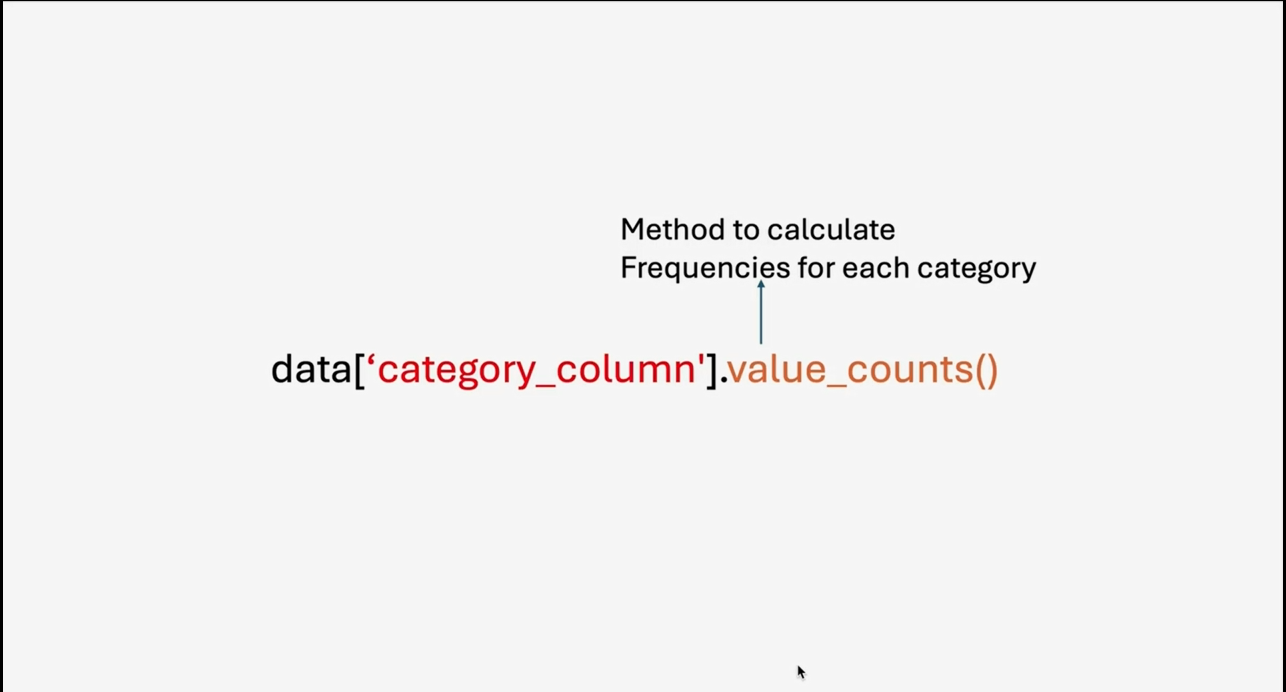

In [171]:
# Count the frequency of each unique value in the "Purchase_Channel" column
# of the dataframe 'final_data' and store the result in 'freq_purchase_channel'.
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()

# Display the frequency counts of purchase channels
freq_purchase_channel

Purchase_Channel
Online      65
In-store    34
Name: count, dtype: int64

In [172]:
len(final_data['Purchase_Channel'])

99

In [173]:
# Convert the frequency counts of purchase channels into percentages.
# Divide each count in 'freq_purchase_channel' by the total number of records
# in the 'Purchase_Channel' column, then multiply by 100 to get percentages.
freq_purchase_channel = freq_purchase_channel / len(final_data['Purchase_Channel']) * 100

# Display the percentage distribution of purchase channels
freq_purchase_channel

Purchase_Channel
Online      65.656566
In-store    34.343434
Name: count, dtype: float64

In [174]:
final_data.describe()

Age         Income  Frequency_of_Purchases  \
count  99.000000      99.000000               99.000000   
mean   35.101010   58115.202020                9.444444   
std     9.825513   18617.672182                3.252071   
min    17.000000   15531.000000                1.000000   
25%    28.000000   45724.000000                7.000000   
50%    35.000000   58033.000000               10.000000   
75%    42.000000   71484.500000               12.000000   
max    54.000000  107662.000000               16.000000   

       Average_Purchase_Amount  Customer_Lifespan_Months    Recency  \
count             9.900000e+01                 99.000000  99.000000   
mean              1.356871e+05                  2.545455   2.646465   
std               1.349094e+06                  1.012904   1.145650   
min               3.697500e+01                  0.000000   1.000000   
25%               7.647000e+01                  2.000000   2.000000   
50%               9.778200e+01                  3.000000   3.000000   
75%               1.206160e+02                  3.000000   4.000000   
max               1.342341e+07                  5.000000   4.000000   

       Frequency_Score  Monetary_Score  
count        99.000000       99.000000  
mean          2.595960        2.515152  
std           1.115011        1.119071  
min           1.000000        1.000000  
25%           2.000000        2.000000  
50%           3.000000        3.000000  
75%           4.000000        3.500000  
max           4.000000        4.000000

In [175]:
round(final_data.describe(),2)

Age     Income  Frequency_of_Purchases  Average_Purchase_Amount  \
count  99.00      99.00                   99.00                    99.00   
mean   35.10   58115.20                    9.44                135687.08   
std     9.83   18617.67                    3.25               1349093.81   
min    17.00   15531.00                    1.00                    36.98   
25%    28.00   45724.00                    7.00                    76.47   
50%    35.00   58033.00                   10.00                    97.78   
75%    42.00   71484.50                   12.00                   120.62   
max    54.00  107662.00                   16.00              13423411.96   

       Customer_Lifespan_Months  Recency  Frequency_Score  Monetary_Score  
count                     99.00    99.00            99.00           99.00  
mean                       2.55     2.65             2.60            2.52  
std                        1.01     1.15             1.12            1.12  
min                        0.00     1.00             1.00            1.00  
25%                        2.00     2.00             2.00            2.00  
50%                        3.00     3.00             3.00            3.00  
75%                        3.00     4.00             4.00            3.50  
max                        5.00     4.00             4.00            4.00

In [176]:
max(final_data['Average_Purchase_Amount'])

13423411.958

In [177]:
# The value 13423412.0 (≈ 13423411.958) is considered an inconsistent/outlier value
# in the column "Average_Purchase_Amount".
# To clean the dataset, we remove rows where "Average_Purchase_Amount"
# is equal to 13423411.958.

final_data = final_data[final_data['Average_Purchase_Amount'] != 13423411.958]

In [178]:
max(final_data['Average_Purchase_Amount'])

193.046

---

# 📊 Measures of Central Tendency & Dispersion

Measures of central tendency describe the **center or typical value** of a dataset. The main metrics are **Mean, Median, and Mode**.

---

## 🔹 **Mean (Average)**

* 📝 **Definition**: Sum of all values divided by the total number of values.
* 📌 **Formula**:

$$
\text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

* 💡 **Example**: Dataset = \[2, 4, 6, 8]

$$
\text{Mean} = \frac{2 + 4 + 6 + 8}{4} = 5
$$

---

## 🔹 **Median**

* 📝 **Definition**: Middle value when data is sorted.

  * **Even count** → average of two middle values
  * **Odd count** → middle value

* 💡 **Example (Even)**: \[3, 1, 4, 2] → Ordered: \[1, 2, 3, 4] → Median = 2.5

* 💡 **Example (Odd)**: \[1, 3, 2] → Ordered: \[1, 2, 3] → Median = 2

---

## 🔹 **Mode**

* 📝 **Definition**: Most frequent value(s) in a dataset.

  * **Unimodal** → one mode
  * **Bimodal** → two modes
  * **Multimodal** → more than two
  * **No mode** → all values unique

* 💡 **Example (Unimodal)**: \[1, 2, 2, 3, 4] → Mode = 2

* 💡 **Example (Bimodal)**: \[1, 1, 2, 2, 3] → Modes = 1, 2

---

## 🔹 **Skewness**

* 📝 **Definition**: Measures **asymmetry** of the distribution.

  * **Negative (Left-skewed)** → tail on left, most data on right
  * **Zero** → symmetric distribution
  * **Positive (Right-skewed)** → tail on right, most data on left

---

## 🔹 **Kurtosis**

* 📝 **Definition**: Measures **tailedness** of a distribution.

  * **Mesokurtic** → \~3, normal tails and peak
  * **Leptokurtic** → >3, heavy tails, more outliers
  * **Platykurtic** → <3, light tails, flatter peak

---

## 🔹 **Variance (σ² or s²)**

* 📝 **Definition**: Spread of data around the mean.
* **Population variance**:

$$
\sigma^2 = \frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}
$$

* **Sample variance**:

$$
s^2 = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}
$$

---

## 🔹 **Covariance**

* 📝 **Definition**: Measures how two variables vary together.

  * Positive → increase together
  * Negative → one increases, one decreases
  * Near 0 → little/no linear relationship

* **Population**:

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{N} (x_i - \mu_X)(y_i - \mu_Y)}{N}
$$

* **Sample**:

$$
\text{Cov}(X,Y) = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n - 1}
$$

---

## 🔹 **Standard Deviation (σ or s)**

* 📝 **Definition**: Measures **dispersion** of values around the mean.

  * Low → values close to mean
  * High → values spread out

* **Population SD**:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{N} (x_i - \mu)^2}{N}}
$$

* **Sample SD**:

$$
s = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n - 1}}
$$

---


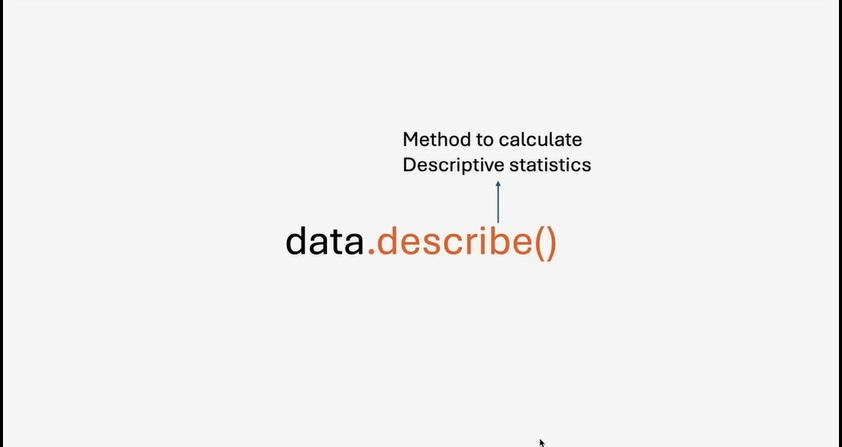

In [179]:
final_data.describe()

Age         Income  Frequency_of_Purchases  \
count  98.000000      98.000000               98.000000   
mean   35.030612   58130.979592                9.428571   
std     9.850903   18712.728227                3.264934   
min    17.000000   15531.000000                1.000000   
25%    28.000000   45481.500000                7.000000   
50%    35.000000   58033.000000               10.000000   
75%    41.750000   71994.250000               12.000000   
max    54.000000  107662.000000               16.000000   

       Average_Purchase_Amount  Customer_Lifespan_Months    Recency  \
count                98.000000                 98.000000  98.000000   
mean                 98.052806                  2.540816   2.663265   
std                  29.009387                  1.017054   1.139215   
min                  36.975000                  0.000000   1.000000   
25%                  76.292000                  2.000000   2.000000   
50%                  97.167500                  3.000000   3.000000   
75%                 119.878000                  3.000000   4.000000   
max                 193.046000                  5.000000   4.000000   

       Frequency_Score  Monetary_Score  
count        98.000000       98.000000  
mean          2.612245        2.530612  
std           1.108846        1.114146  
min           1.000000        1.000000  
25%           2.000000        2.000000  
50%           3.000000        3.000000  
75%           4.000000        3.750000  
max           4.000000        4.000000

In [180]:
round(final_data.describe())

Age    Income  Frequency_of_Purchases  Average_Purchase_Amount  \
count  98.0      98.0                    98.0                     98.0   
mean   35.0   58131.0                     9.0                     98.0   
std    10.0   18713.0                     3.0                     29.0   
min    17.0   15531.0                     1.0                     37.0   
25%    28.0   45482.0                     7.0                     76.0   
50%    35.0   58033.0                    10.0                     97.0   
75%    42.0   71994.0                    12.0                    120.0   
max    54.0  107662.0                    16.0                    193.0   

       Customer_Lifespan_Months  Recency  Frequency_Score  Monetary_Score  
count                      98.0     98.0             98.0            98.0  
mean                        3.0      3.0              3.0             3.0  
std                         1.0      1.0              1.0             1.0  
min                         0.0      1.0              1.0             1.0  
25%                         2.0      2.0              2.0             2.0  
50%                         3.0      3.0              3.0             3.0  
75%                         3.0      4.0              4.0             4.0  
max                         5.0      4.0              4.0             4.0

#**Group by**#

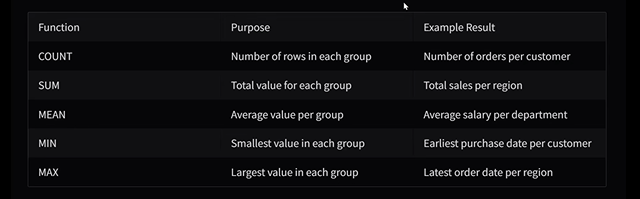

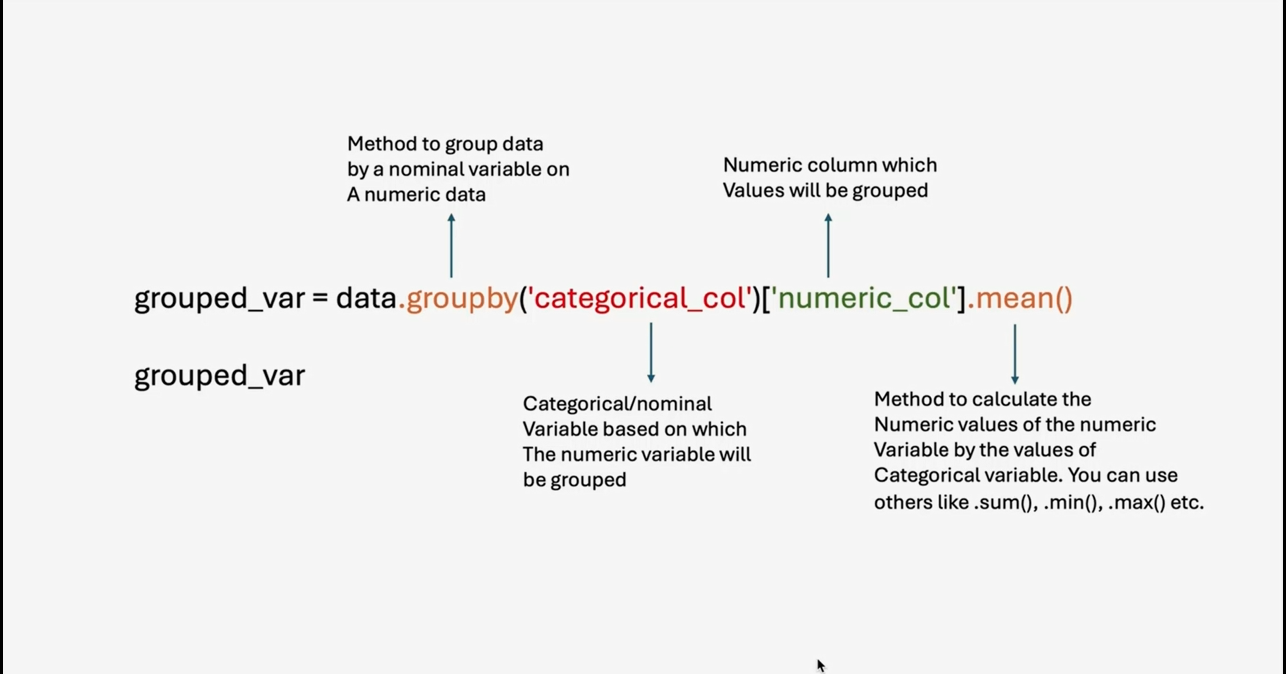

In [181]:
# Group the dataset 'final_data' by the 'City' column.
# For each city, calculate the median value of 'Average_Purchase_Amount'.
# The result will be a Series with cities as the index and median purchase amounts as the values.
city_Purchase_Amount = final_data.groupby('City')['Average_Purchase_Amount'].median()

# Display the median purchase amount for each city
city_Purchase_Amount

City
Chicago        102.1860
Houston         87.6615
Los Angeles    100.7250
New York        94.4690
Name: Average_Purchase_Amount, dtype: float64

---

# 📊 Pivot Table

---

## 🔹 **Definition**

A **pivot table** is a powerful data tool in spreadsheets or Python (**Excel, Google Sheets, Pandas**) that **summarizes, analyzes, and presents large datasets** efficiently.

👉 It allows you to **transform rows into columns and vice versa**, making it easy to explore **relationships, comparisons, and trends**.

---

## 🔹 **Uses of Pivot Tables**

1. **⚡ Fast Data Summarization**

   * Aggregate data with **sum, average, count, min, max**, etc., without complex formulas.

2. **🔄 Interactive Analysis**

   * Rearrange fields to view data from multiple perspectives and uncover deeper insights.

3. **📂 Handle Large Datasets**

   * Efficiently focus on specific segments or categories in large datasets.

4. **📑 Dynamic Reporting**

   * Automatically updates when the source data changes → real-time reports.

5. **📈 Reveal Patterns**

   * Uncover trends, patterns, and anomalies for informed decision-making.

---


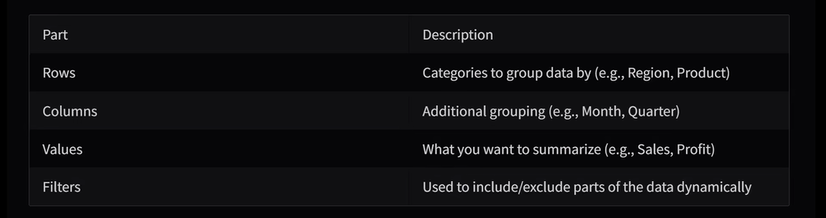

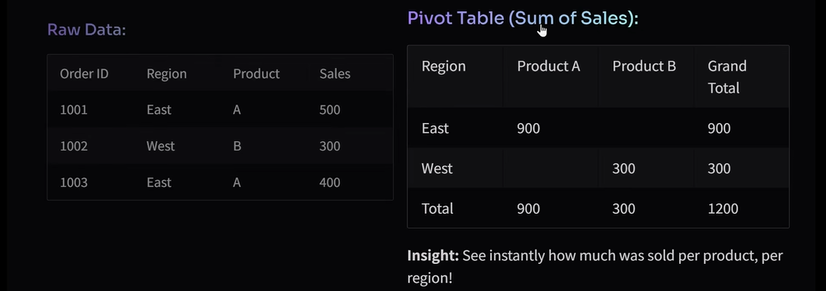

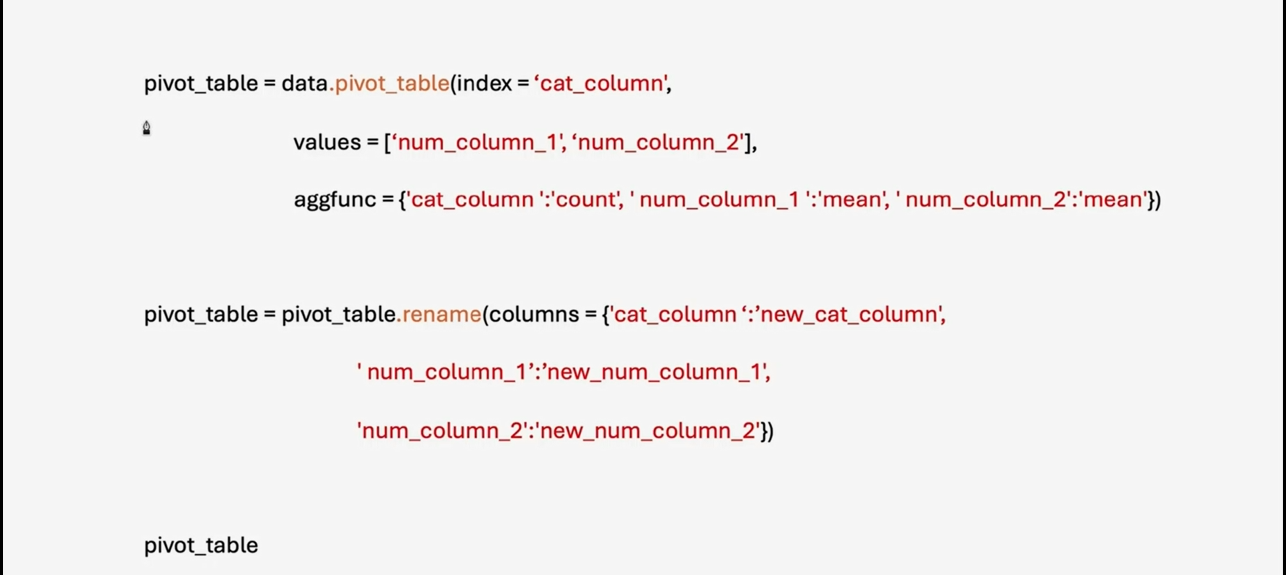

In [182]:
#pivot table
pivot_table0 =final_data.pivot_table(index='Churn_Status',
                                    values=['Recency',	'Frequency_Score',	'Monetary_Score'],
                                    aggfunc='mean')
pivot_table0

Frequency_Score  Monetary_Score   Recency
Churn_Status                                           
No                   2.744186        2.558140  2.720930
Yes                  2.509091        2.509091  2.618182

In [183]:
#pivot table
# Create a pivot table from the dataframe 'final_data'
# - 'Churn_Status' is used as the row index (groups data by churned / not churned customers).
# - The values to summarize are: 'Recency', 'Frequency_Score', and 'Monetary_Score'.
# - The aggregation function (aggfunc) is set to 'mean' for each column,
#   so it will calculate the average Recency, Frequency_Score, and Monetary_Score
#   for each Churn_Status group.

pivot_table = final_data.pivot_table(
    index='Churn_Status',
    values=['Recency', 'Frequency_Score', 'Monetary_Score'],
    aggfunc={'Recency': 'mean', 'Frequency_Score': 'mean', 'Monetary_Score': 'mean','Churn_Status':'count'})

# Display the pivot table: average RFM values grouped by churn status
pivot_table

Churn_Status  Frequency_Score  Monetary_Score   Recency
Churn_Status                                                         
No                      43         2.744186        2.558140  2.720930
Yes                     55         2.509091        2.509091  2.618182

In [184]:
pivot_table = pivot_table.rename(columns={'Churn_Status':'freq_Churn_Status',
                                          'Recency':'freq_Recency',
                                          'Frequency_Score':'freq_Frequency_Score',
                                          'Monetary_Score':'freq_Monetary_Score'})
pivot_table

freq_Churn_Status  freq_Frequency_Score  freq_Monetary_Score  \
Churn_Status                                                                 
No                           43              2.744186             2.558140   
Yes                          55              2.509091             2.509091   

              freq_Recency  
Churn_Status                
No                2.720930  
Yes               2.618182

---

# 🔢 Crosstab Analysis

---

## 🔹 **Definition**

**Crosstab analysis** (or **contingency table analysis**) is a statistical method to study the **relationship between two or more categorical variables**.

👉 It creates a **matrix (crosstab)** displaying the frequency of each combination of categories, helping analysts **see how one variable relates to another**.

---

## 🔹 **Importance of Crosstab Analysis**

1. **📊 Summarize Categorical Data**

   * Organizes variables into a clear table, simplifying interpretation of large datasets.

2. **🔍 Identify Patterns & Relationships**

   * Reveals trends and associations that may not be obvious in raw data.

3. **🎯 Support Decision Making**

   * Helps understand interactions between categories — useful for marketing, strategy, and resource allocation.

4. **🧪 Basis for Statistical Tests**

   * Enables tests like the **Chi-Square Test of Independence** to check if relationships are statistically significant.

---


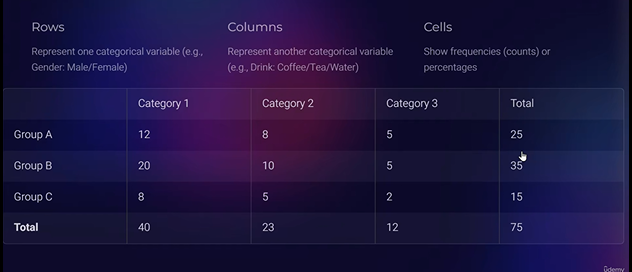

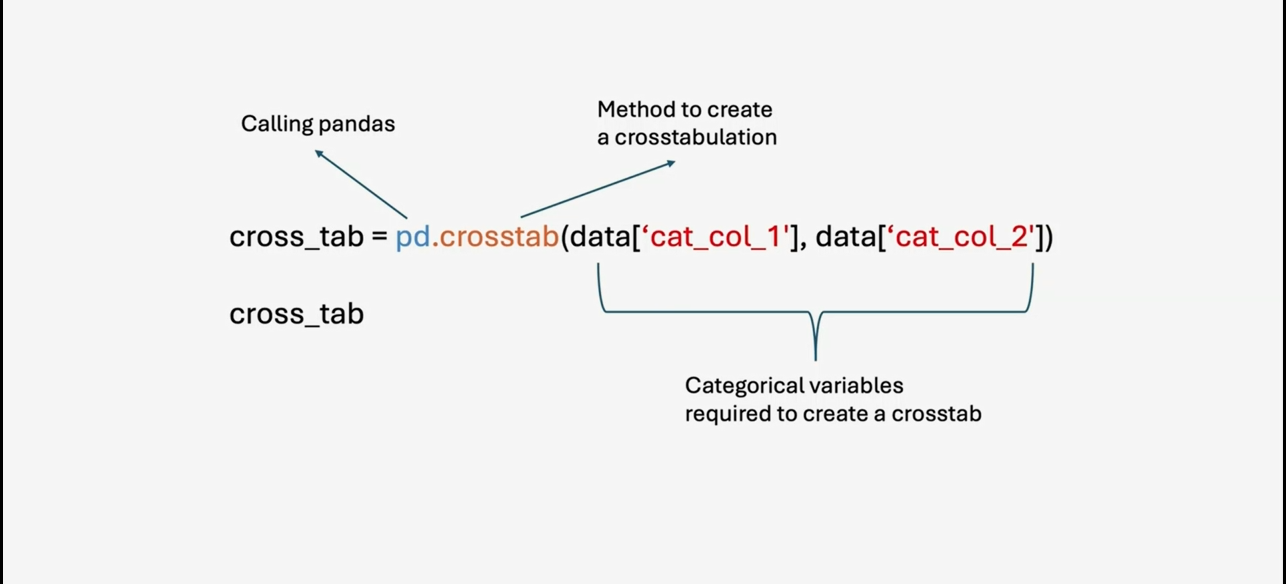

In [185]:
#relationship between two or more categorical variables.
cross_tab = pd.crosstab(final_data['City'], final_data['Purchase_Channel'])
cross_tab

Purchase_Channel  In-store  Online
City                              
Chicago                  8      17
Houston                 11      21
Los Angeles              9      15
New York                 5      12

In [186]:
cross_tab1=pd.crosstab(final_data['Region'],final_data['Purchase_Channel'])
cross_tab1

Purchase_Channel  In-store  Online
Region                            
Midwest                 10      26
Northeast               10      18
West                    13      21

In [187]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
freq_purchase_channel

Purchase_Channel
Online      65
In-store    33
Name: count, dtype: int64


---

# 📊 Understanding Bar Charts

---

## 🔹 **Definition**

A **bar chart** is a graphical tool for **categorical data**, where **bar length is proportional to the value** it represents.

* Can be **vertical** (column chart) or **horizontal**.

---

## 🔹 **Key Features**

1. **📂 Categorical Comparison**

   * Visual comparison of discrete categories.

2. **↕ Bar Orientation**

   * **Vertical Bars** → Emphasize magnitude differences.
   * **Horizontal Bars** → Ideal for long category labels.

3. **📏 Value Representation**

   * Bar length reflects the category value.
   * Axis shows the measurement scale clearly.

---

## 🔹 **Common Uses**

* 📦 Compare **sales by product category**
* 📝 Show **survey response distributions**
* 👥 Visualize **demographic breakdowns**
* 📈 Display **performance metrics** across teams/products

---

## 🔹 **Best Practices**

✔ Use consistent colors for the same categories
✔ Sort bars logically (**alphabetical or numerical**)
✔ Include clear **axis labels** and descriptive **title**
✔ Maintain proper spacing between bars
✔ Always start **y-axis at zero** to avoid misleading visuals

---

## 🔹 **Variations of Bar Charts**

* **📊 Grouped Bar Chart** → Compare subgroups within categories
* **📚 Stacked Bar Chart** → Show part-to-whole relationships
* **💯 100% Stacked Bar Chart** → Show percentage contributions

---



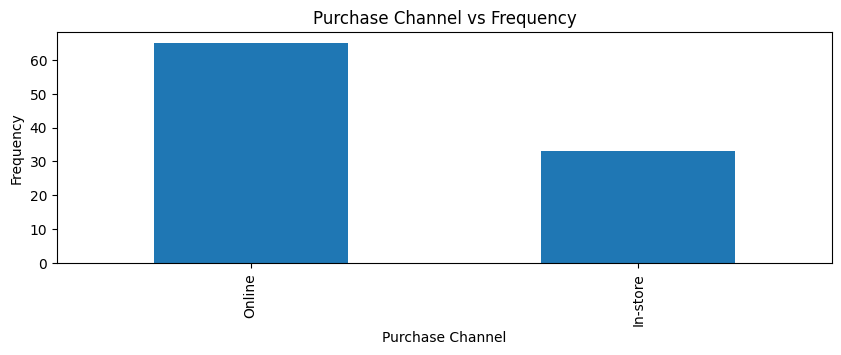

In [188]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))

# Plot the purchase channel frequencies as a bar chart
# 'freq_purchase_channel' is a Series with channels as index and their frequency/percentage as values
freq_purchase_channel.plot(kind='bar')

# Add a title to the chart
plt.title('Purchase Channel vs Frequency')

# Label the X-axis (purchase channel names)
plt.xlabel('Purchase Channel')

# Label the Y-axis (frequency or percentage depending on how freq_purchase_channel was calculated)
plt.ylabel('Frequency')

# Display the plot
plt.show()

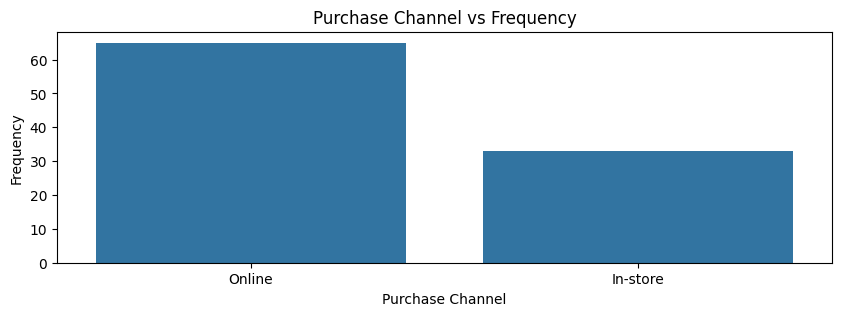

In [189]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))

# Create a countplot using Seaborn
# - 'data=final_data' specifies the dataset
# - 'x="Purchase_Channel"' means bars will represent the frequency of each purchase channel
sns.countplot(data=final_data, x='Purchase_Channel')

# Add a title to the chart
plt.title('Purchase Channel vs Frequency')

# Label the X-axis (purchase channel names)
plt.xlabel('Purchase Channel')

# Label the Y-axis (number of occurrences of each channel)
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [190]:
#relationship between two or more categorical variables.
cross_tab = pd.crosstab(final_data['City'], final_data['Churn_Status'])
cross_tab

Churn_Status  No  Yes
City                 
Chicago        8   17
Houston       16   16
Los Angeles   10   14
New York       9    8

<Figure size 1000x300 with 0 Axes>

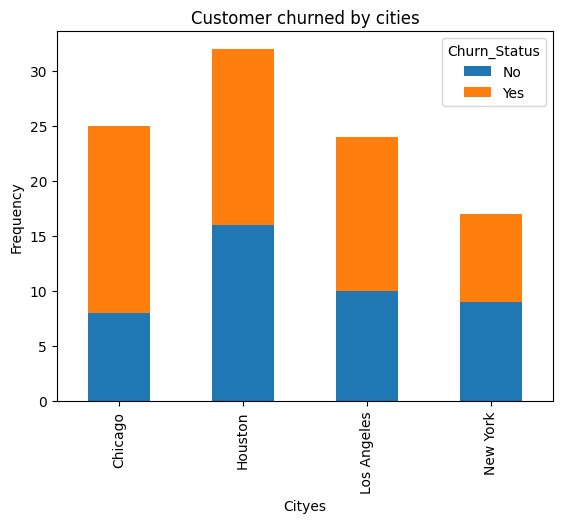

In [191]:
plt.figure(figsize=(10, 3))
cross_tab.plot(kind='bar', stacked=True)#false
plt.title('Customer churned by cities')
plt.xlabel('Cityes')
plt.ylabel('Frequency')
plt.show()

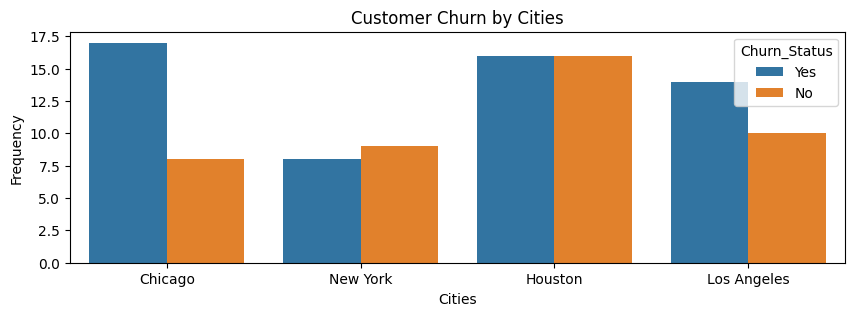

In [192]:
# Set the figure size to 10 (width) x 3 (height) inches
plt.figure(figsize=(10, 3))
# Create a grouped countplot with Seaborn
# - 'data=final_data' specifies the dataset
# - 'x="City"' means cities will be shown on the X-axis
# - 'hue="Churn_Status"' separates bars within each city by churn status
#    (e.g., churned vs not churned customers)
sns.countplot(data=final_data, x='City', hue='Churn_Status')
# Add a title to the chart
plt.title('Customer Churn by Cities')
# Label the X-axis (city names)
plt.xlabel('Cities')
# Label the Y-axis (number of customers)
plt.ylabel('Frequency')
# Display the plot
plt.show()

# 🥧 **Pie Chart**

---

## 🔹 Definition  
A **pie chart** is a circular statistical graphic divided into **slices** to illustrate **numerical proportions**.  
- Each slice represents a **category**.  
- The size of each slice is **proportional** to its value relative to the **whole**.  

---

## 🔹 Purpose  

- 📊 **Show Composition** → Displays how different parts contribute to the total.  
- 📉 **Visualize Proportions** → Makes it easy to compare percentages at a glance.  
- 🌐 **Highlight Relative Contributions** → Emphasizes which categories are the **largest** or **smallest**.  

---

## 🔹 Examples  

- 🏢 **Market Share** → Shows how different companies contribute to total industry share.  
- 💰 **Budget Allocation** → Visualizes how resources are distributed across departments.  
- 🗳 **Election Results** → Displays proportion of votes among candidates or parties.  

---

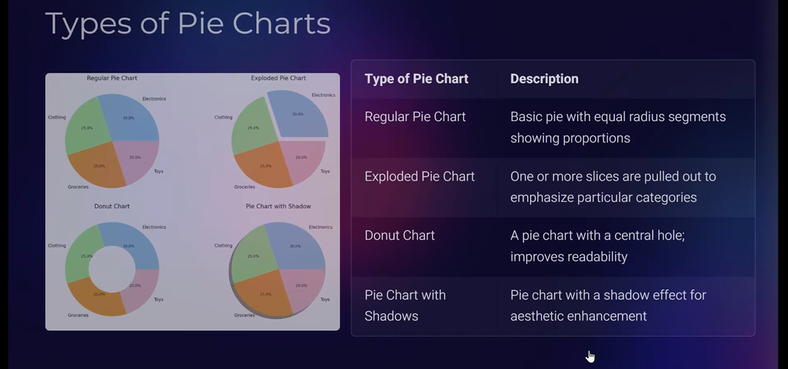

In [193]:
freq_purchase_channel = final_data['Purchase_Channel'].value_counts()
print(freq_purchase_channel)
print('______________________________________________________________________________________________________')
freq_purchase_channel = freq_purchase_channel / len(final_data['Purchase_Channel']) * 100
print(freq_purchase_channel)

Purchase_Channel
Online      65
In-store    33
Name: count, dtype: int64
______________________________________________________________________________________________________
Purchase_Channel
Online      66.326531
In-store    33.673469
Name: count, dtype: float64


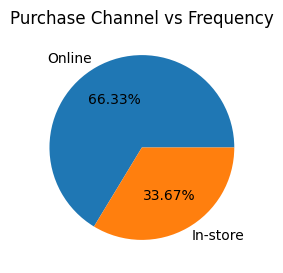

In [194]:
plt.figure(figsize=(10, 3))
freq_purchase_channel.plot(kind='pie',autopct='%1.2f%%')
plt.title('Purchase Channel vs Frequency')
plt.xlabel('')
plt.ylabel('')
plt.show()

# 📈 **Line Chart**

---

## 🔹 Definition  
A **line chart** is a graphical representation where **data points are connected by straight lines**.  
- Used to visualize **trends** and **changes** over time or across a continuous variable.  

---

## 🔹 Key Features  

- **📌 Data Points** → Represent individual values in the dataset.  
- **🔗 Lines** → Connect points to show progression or trend.  
- **📏 Axes**  
  - **X-axis**: Independent variable (e.g., time, categories)  
  - **Y-axis**: Dependent variable (e.g., values, measurements)  

---

## 🔹 Purpose  

- **📊 Track Trends** → Ideal for monitoring changes over time (e.g., stock prices, temperature, sales).  
- **⚖️ Compare Variables** → Plot multiple lines to compare datasets on the same chart.  
- **🔍 Identify Patterns** → Detect seasonality, growth, decline, or anomalies in data.  

---

## 🔹 Examples  

- 💹 **Stock Market Trends** → Closing prices over months or years.  
- 🌡 **Temperature Changes** → Daily or monthly variations across a year.  
- 🛒 **Sales Performance** → Monthly sales figures to track growth or decline.  

---
  


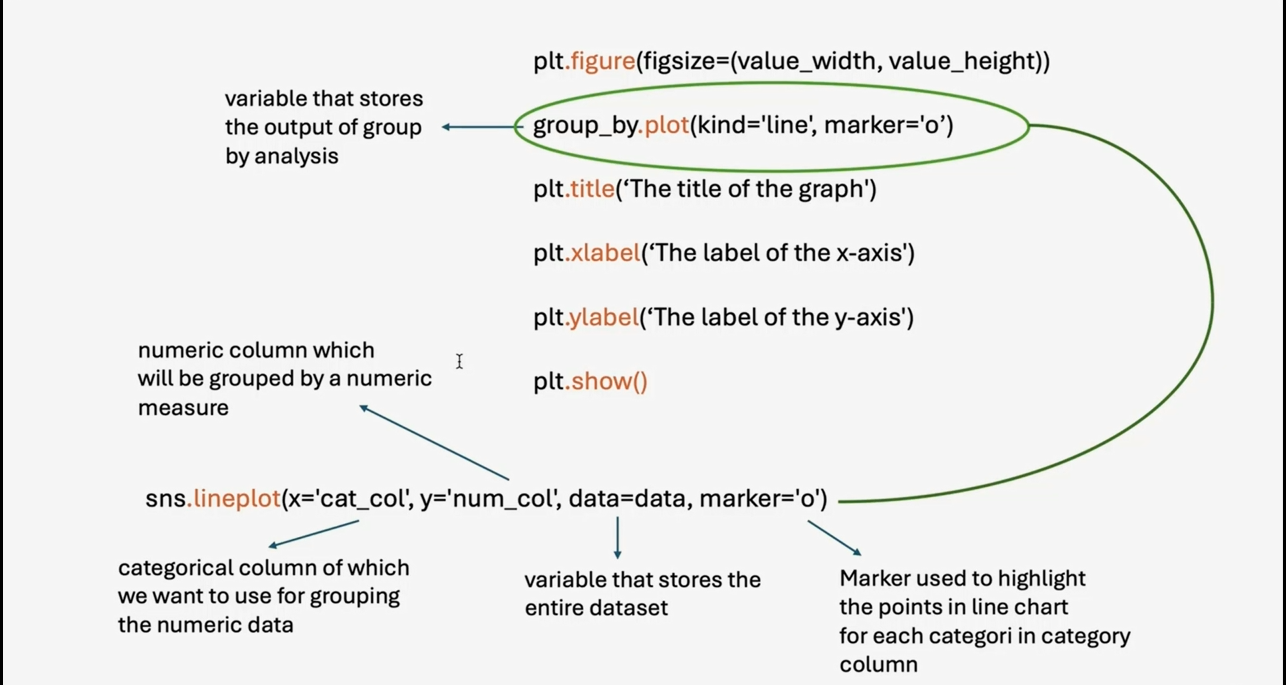

In [195]:
city_Purchase_Amount = final_data.groupby('City')['Average_Purchase_Amount'].median()
city_Purchase_Amount

City
Chicago        102.1860
Houston         87.6615
Los Angeles    100.7250
New York        94.4690
Name: Average_Purchase_Amount, dtype: float64

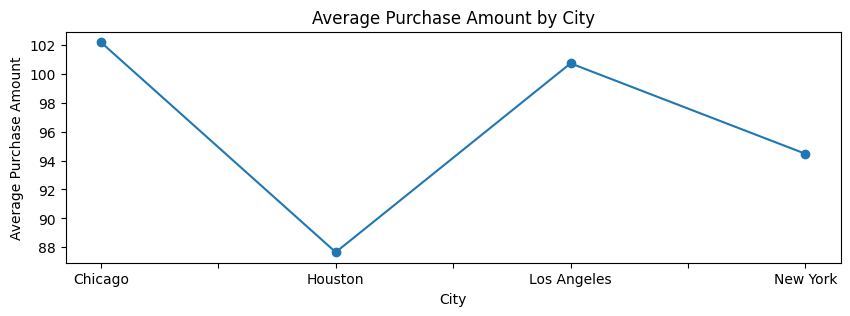

In [196]:
plt.figure(figsize=(10, 3))
city_Purchase_Amount.plot(kind='line', marker='o')
plt.title('Average Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()

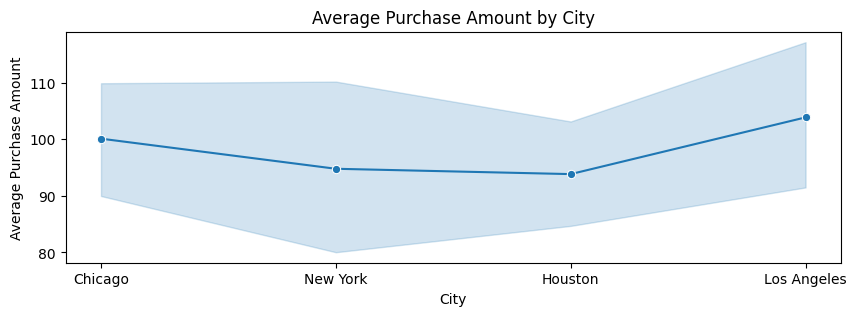

In [197]:
plt.figure(figsize=(10, 3))
sns.lineplot(data=final_data, x='City', y='Average_Purchase_Amount',marker='o')
plt.title('Average Purchase Amount by City')
plt.xlabel('City')
plt.ylabel('Average Purchase Amount')
plt.show()


---

# 📊 Histogram

---

## 🔹 **Definition**

A **histogram** is a graphical representation of the **distribution of numerical data**.

* Data is divided into **intervals (bins)**.
* Each bin is represented as a **bar**, where the **height reflects the frequency** of observations in that interval.

---

## 🔹 **Key Features**

* **📦 Bins** → Divide data into intervals of equal or varying widths
* **📈 Frequency** → Bar height represents the number of observations per bin
* **🔢 Continuous Data** → Best for continuous numerical data to visualize spread and patterns

---

## 🔹 **Purpose**

* **📊 Visualize Distribution** → Detect normality, skewness, or outliers
* **📏 Understand Data Spread** → Explore central tendency, mode, range, and variability
* **⚖️ Compare Datasets** → Overlay or place side-by-side to analyze differences

---

## 🔹 **Examples**

* 📝 **Exam Scores** → Distribution across score ranges
* 📏 **Height Distribution** → Number of individuals in specific height intervals
* 💰 **Sales Data** → Frequency of transactions across price ranges

---


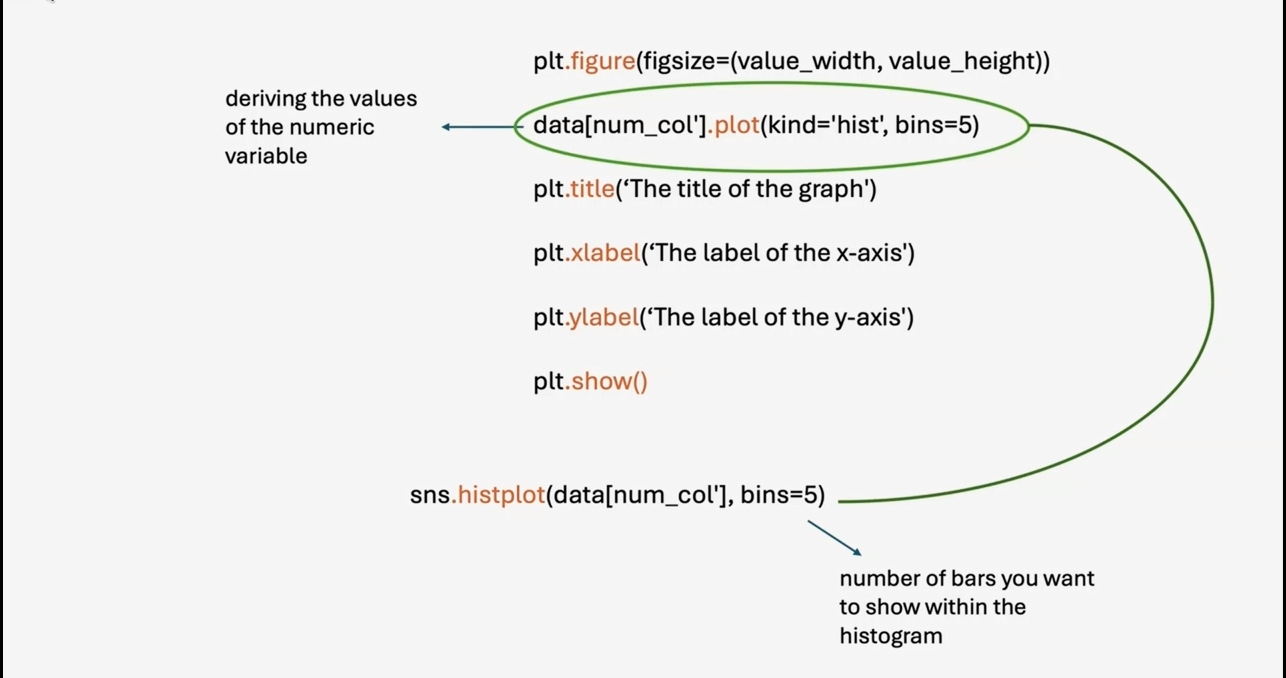

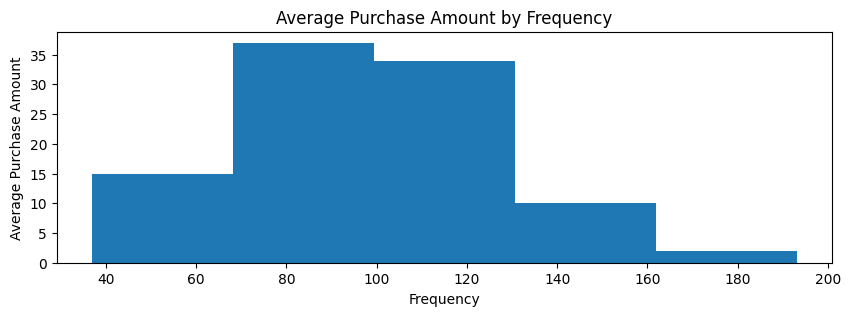

In [198]:
plt.figure(figsize=(10, 3))
final_data['Average_Purchase_Amount'].plot(kind='hist', bins=5)
plt.title('Average Purchase Amount by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Average Purchase Amount')
plt.show()

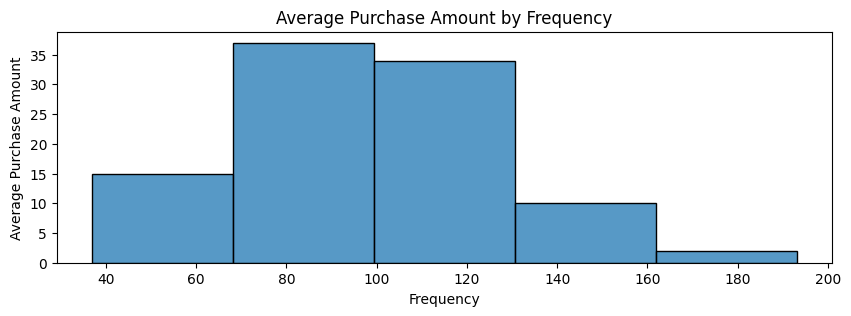

In [199]:
plt.figure(figsize=(10, 3))
sns.histplot(data=final_data, x='Average_Purchase_Amount', bins=5)
plt.title('Average Purchase Amount by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Average Purchase Amount')
plt.show()


---

# 📍 Scatter Plot

---

## 🔹 **Definition**

A **scatter plot** displays values for **two variables** as points on a Cartesian plane.

* Each point represents an **observation**.
* **X-axis** → one variable, **Y-axis** → the other variable.

---

## 🔹 **Key Features**

* **📍 Data Points** → Each point represents a pair of values
* **📏 Axes** → Clearly show which variable is plotted where
* **📈 Trend Identification** → Highlights patterns, correlations, or relationships

---

## 🔹 **Purpose**

* **🔗 Visualize Relationships** → Identify positive, negative, or no correlation
* **⚠️ Detect Outliers** → Spot unusual observations deviating from trends
* **📊 Assess Distribution** → Understand spread and clustering of points

---

## 🔹 **Examples**

* 📏 **Height vs. Weight** → Check correlation between individuals’ height and weight
* 💰 **Sales vs. Advertising Spend** → Examine effect of marketing on sales
* 📝 **Study Hours vs. Test Scores** → Explore relationship between study time and performance

---


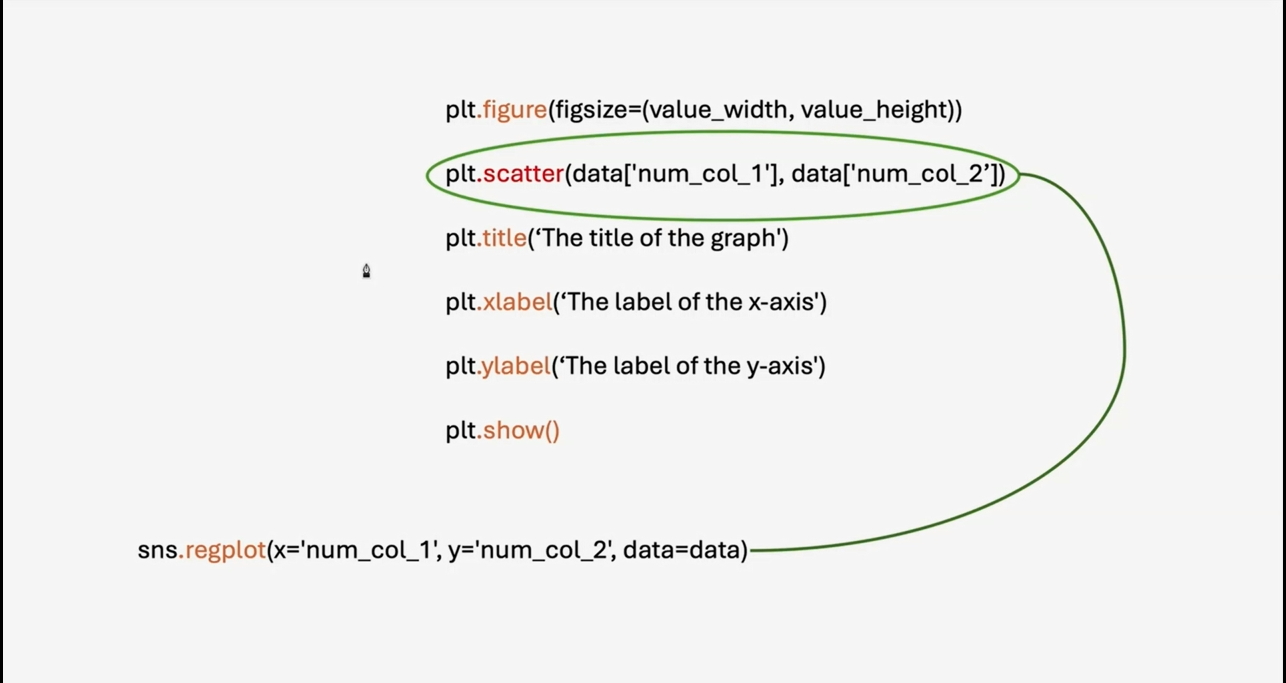

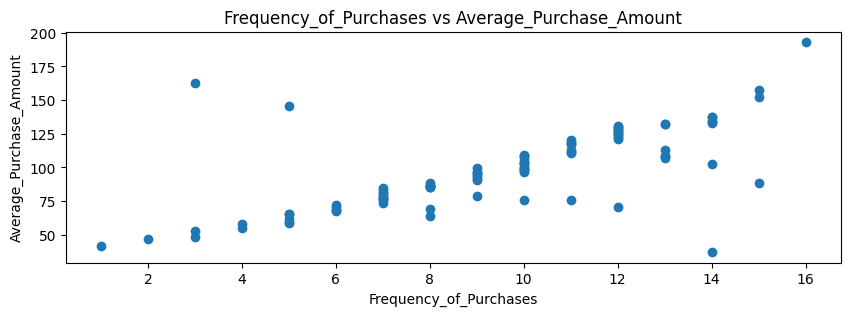

In [200]:
plt.figure(figsize=(10, 3))
plt.scatter(final_data['Frequency_of_Purchases'], final_data['Average_Purchase_Amount'])
plt.title('Frequency_of_Purchases vs Average_Purchase_Amount')
plt.xlabel('Frequency_of_Purchases')
plt.ylabel('Average_Purchase_Amount')
plt.show()

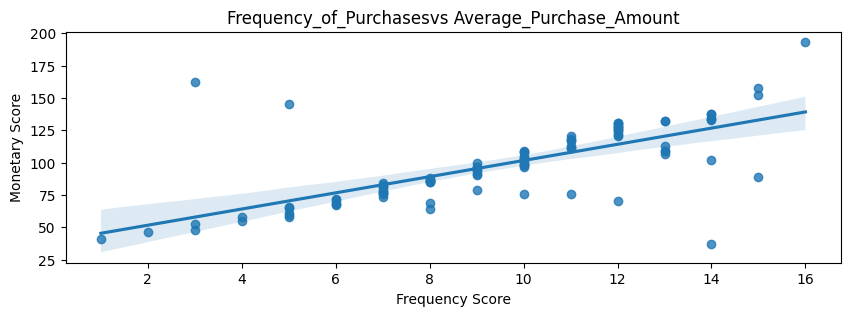

In [201]:
plt.figure(figsize=(10, 3))
#sns.scatterplot(data=final_data, x='Frequency_of_Purchases' ,y='Average_Purchase_Amount')
sns.regplot(data=final_data, x='Frequency_of_Purchases' ,y='Average_Purchase_Amount')
plt.title('Frequency_of_Purchasesvs Average_Purchase_Amount')
plt.xlabel('Frequency Score')
plt.ylabel('Monetary Score')
plt.show()


---

# 🌡️ Heat Map

---

## 🔹 **Definition**

A **heat map** is a data visualization technique that uses **color** to represent values in a **matrix or 2D dataset**.

* Each cell’s color reflects the **magnitude** of its value, enabling **quick visual interpretation** of patterns, trends, and variations.

---

## 🔹 **Key Features**

* **🌈 Color Gradient** → Represents value magnitude through varying colors
* **📊 Matrix Format** → Grid layout; each cell shows a value at the intersection of two variables
* **🎨 Visual Density** → Color intensity highlights high vs. low values

---

## 🔹 **Purpose**

* **🔍 Visualize Complex Data** → Detect patterns or correlations not obvious in raw data
* **📈 Highlight Trends** → Spot clusters, anomalies, or patterns easily
* **⚖️ Facilitate Comparison** → Quickly compare categories/groups using color cues

---

## 🔹 **Examples**

* 📈 **Correlation Matrix** → Colors indicate strength/direction of relationships
* 🌐 **Website Analytics** → Highlight areas with most user clicks
* 🗺️ **Geographical Data** → Show population density or event intensity across regions

---

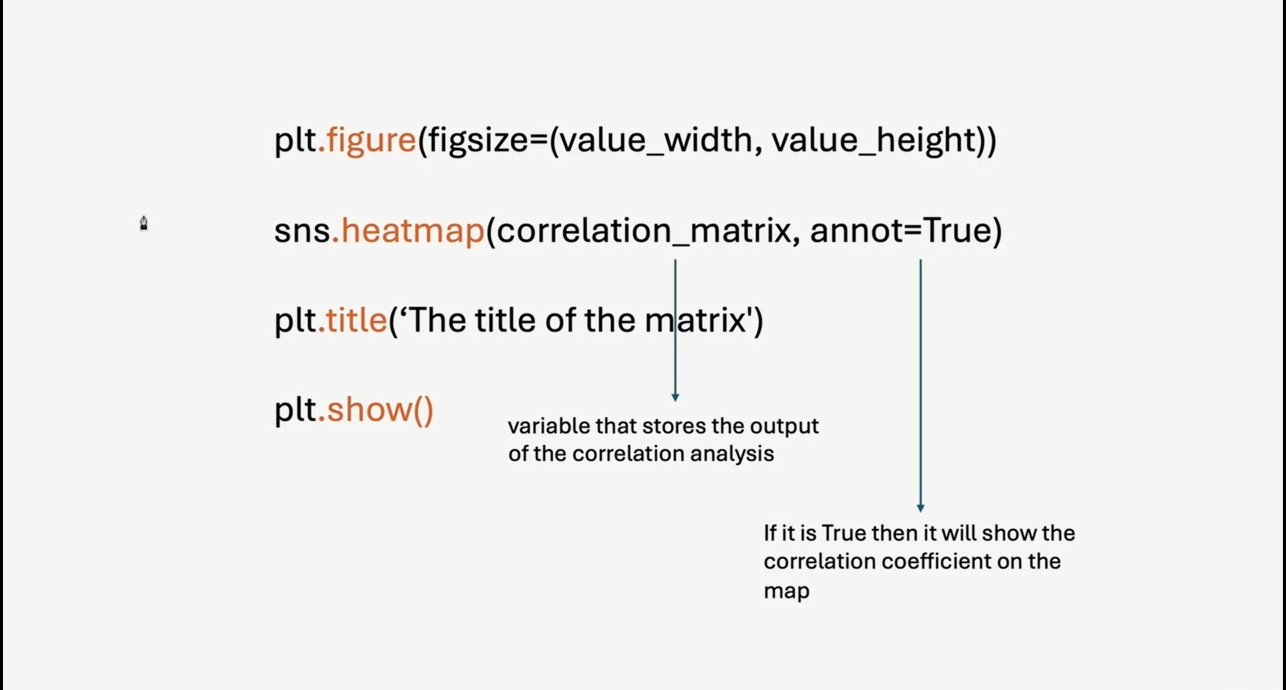

In [202]:
# Select only the numerical columns (both float and integer types) from the dataframe
num_variables = final_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the selected numerical columns
# - 'corr()' computes pairwise correlation between columns
# - 'round(..., 3)' rounds the correlation values to 3 decimal places for easier reading
correl = round(final_data[num_variables].corr(), 3)

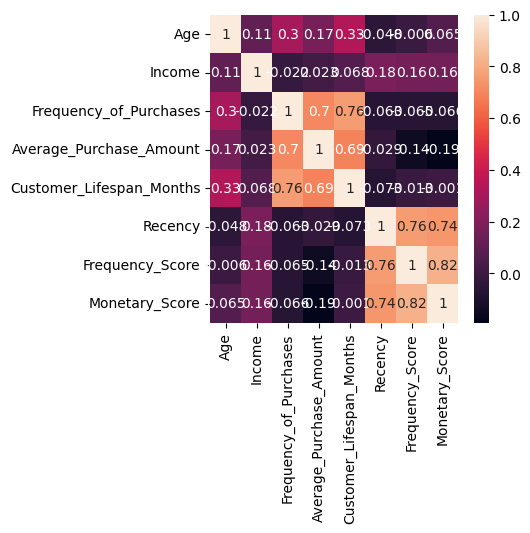

In [203]:
plt.figure(figsize=(4,4))
sns.heatmap(data=correl, annot=True)
plt.show()

---

# 📦 Boxplot (Whisker Plot)

---

## 🔹 **Definition**

A **boxplot** is a standardized way to display the **distribution of data** using a **five-number summary**.

* Reveals **central tendency**, **variability**, **skewness**, and **outliers**.
* Ideal for **comparing distributions across groups**.

---

## 🔹 **Key Features**

* **📦 Box** → Shows the **Interquartile Range (IQR)** (middle 50% of the data)
* **📏 Whiskers** → Extend to **1.5 × IQR** from Q1 and Q3
* **⚠️ Outliers** → Points beyond whiskers, plotted individually

---

## 🔹 **Five-Number Summary**

1. **Minimum** → Smallest data point
2. **Q1 (First Quartile)** → 25th percentile, median of lower half
3. **Median (Q2)** → 50th percentile, middle value
4. **Q3 (Third Quartile)** → 75th percentile, median of upper half
5. **Maximum** → Largest data point

---

## 🔹 **Purpose of a Boxplot**

* **📊 Visualize Distribution** → Central tendency & spread
* **⚠️ Identify Outliers** → Detect extreme values affecting analysis
* **📈 Compare Groups** → Efficiently compare multiple categories

---


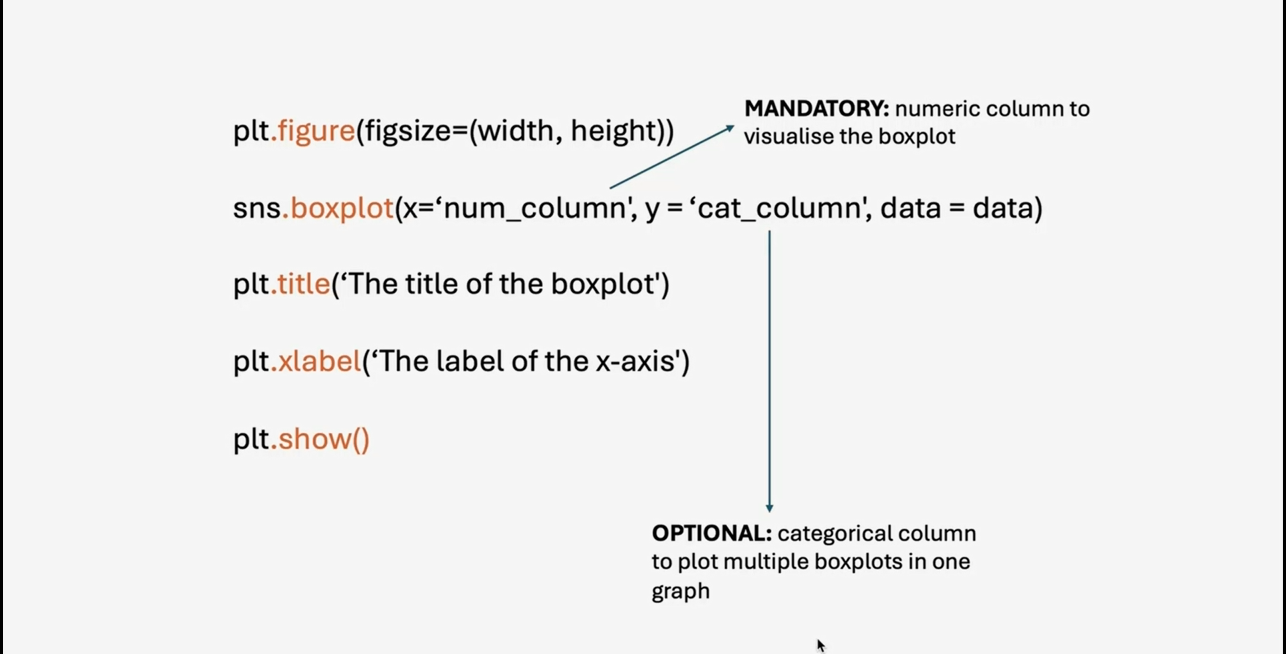

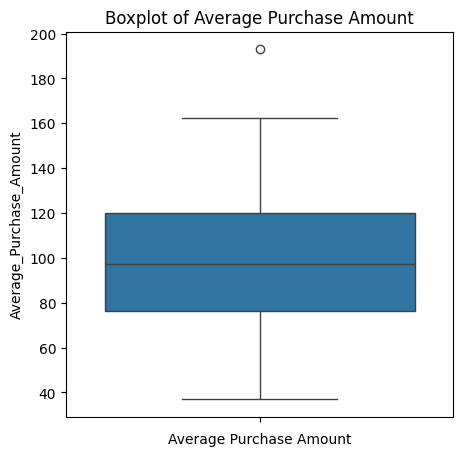

In [204]:
plt.figure(figsize=(5,5))
sns.boxplot(data=final_data, y='Average_Purchase_Amount')
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()

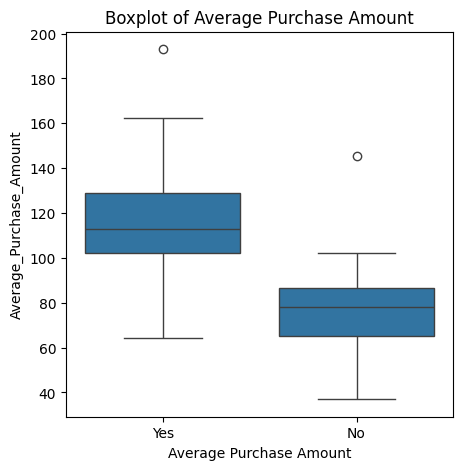

In [205]:
plt.figure(figsize=(5,5))
sns.boxplot(data=final_data, y='Average_Purchase_Amount', x='Churn_Status')
plt.title('Boxplot of Average Purchase Amount')
plt.xlabel('Average Purchase Amount')
plt.show()